##4) Texture Classification

###The Local Binary Pattern (LBP) operator describes the surroundings of a pixel by generating a bit-code from the binary derivatives of a pixel.

In [1]:
#https://www.youtube.com/watch?v=wpAwdsubl1w&ab_channel=Computerphile
#https://fairyonice.github.io/implement-lbp-from%20scratch.html
#https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/
#https://github.com/arsho/local_binary_patterns/blob/master/lbp.py

#imports
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

#### A) Write a function that divides a greyscale image into equally sized non-overlapping windows and returns the feature descriptor for each window as distribution of LBP codes. For each pixel in the window, compare the pixel to each of its 8 neighbours. Convert the resulting bit-codes (base 2) to decimals (base 10 numbers) and compute their histogram over the window. Normalize the histogram (which is now a feature descriptor representing the window). Show in the report the resulting images.

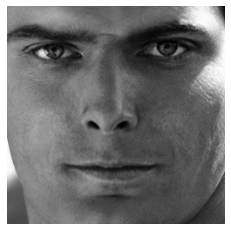

In [2]:
#reading in and showing an image as greyscale
img = cv2.imread("face-1.jpg")
plt.axis('off')
img = img[:,:,::-1]
img = cv2.resize(img, (250,250))
img = np.dot(img[...,:3], [0.3, 0.59, 0.11]) 
plt.imshow(img, cmap='gray')

In [3]:
#so we want to create a loop that will identify a 3x3 region, and compare all values on the rim to the value in the middle
#and then replace the values with a 1 if the rim value is higher than the centre value or 0 is its lower
#then pull the 8 1/0 values and create a bitcode which ill append to the list
#first, ill need to take an image and divide it into N non-overlapping 3x3 windows
#basically splitting one array of img.shape (250x250) into N 3x3 arrays

#making it divisible by 3 for the windows
img = cv2.resize(img, (255,255))

#so we expect there to be img.size/9 windows:
img.size / 9

7225.0

In [4]:

#creating a variable to store the windows
windows = []

#iterate through the height
for i in range(img.shape[0]):
  #iterate through the width
  for j in range(img.shape[1]):
    #get a 3x3 kernel from the image 
    window = img[i:i+3, j:j+3]
    #append it to the windows list 
    windows.append(window)
#checking the length
len(windows)

#this method gives us overlapping windows ):

65025

In [5]:
windows = []
#adding in the scale for the range operator
for i in range(0, img.shape[0], 3):
  for j in range(0, img.shape[1], 3):
    window = img[i:i+3, j:j+3]
    windows.append(window)

len(windows)
#this is the right number of widows! no overlaps

7225

In [6]:
windows[0]

array([[146.09      , 132.50176471, 134.0204902 ],
       [136.38411765, 143.62442042, 138.28869954],
       [139.99852941, 148.69147924, 143.17294118]])

In [7]:
#exploring methodology
win = windows[1]
middleValue = round(win[1,1])
for i in range(win.shape[0]):
  for j in range(win.shape[1]):
    if window[i][j] >= middleValue:
      print(1)
    else:
      print(0)

0
0
0
0
0
0
0
0
0


In [8]:
win

array([[146.22784314, 150.53      , 141.67078431],
       [140.36529988, 148.79892734, 140.66879469],
       [146.71398308, 148.81359862, 140.91626682]])

In [9]:
middleValue

149

In [10]:
bitcodes = []
for window in windows:
  middleValue = round(window[1,1], 2)
  windowBitcode = []
  for i in range(window.shape[0]):
    for j in range(window.shape[1]):
      if window[i][j] >= middleValue:
        windowBitcode.append(1)
      else:
        windowBitcode.append(0)
  bitcodes.append(windowBitcode)

bitcodes[:5]
#this method is able to compare values in a window to the central value - including the central values
#however, we want a comparison to all values EXCLUDING the central values, giving us a code with 8 boolean values

[[1, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0]]

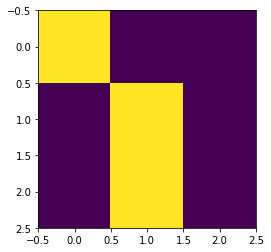

In [11]:
plt.imshow(np.reshape([bitcodes[0]], (3,3)))

In [12]:
windows[0]

array([[146.09      , 132.50176471, 134.0204902 ],
       [136.38411765, 143.62442042, 138.28869954],
       [139.99852941, 148.69147924, 143.17294118]])

In [13]:
#identifying each coordinate in the window
windows[0][0,0] #top left
windows[0][0,1] #top middle
windows[0][0,2] #top right
windows[0][1,0] #middle left
windows[0][1,1] #middle middle
windows[0][1,2] #middle right
windows[0][2,0] #bottom left
windows[0][2,1] #bottom middle
windows[0][2,2] #bottom right

143.1729411764706

In [14]:
#creating a list to store all bitcodes
bitcode = []

#loop to go through each non-overlapping window
for window in windows:
  #identifying the value in the middle of the window 
  middleValue = round(window[1,1], 2)
  #creating a list to store the bitcode as it is built in the loop
  windowBitcode = []
  #for i in range(window.shape[0]):
  #  for j in range(window.shape[1]):
  #top left coordiante comparison
  if window[0,0] >= middleValue:
    #if the value at this coordinate is more than the central value, append a 1 to the windowBitCode list
    windowBitcode.append(1)
  elif window[0,0] < middleValue:
    #if the value at this coordinate is less than the central value, append a 0 to the windowBitCode list
    windowBitcode.append(0)
  #top middle coordiante comparison
  if window[0,1] >= middleValue:
    windowBitcode.append(1)
  elif window[0,1] < middleValue:
    windowBitcode.append(0)
  #top right coordinate comparison
  if window[0,2] >= middleValue:
    windowBitcode.append(1)
  elif window[0,2] < middleValue:
    windowBitcode.append(0)
  #middle left coordiante comparison
  if window[1,0] >= middleValue:
    windowBitcode.append(1)
  elif window[1,0] < middleValue:
    windowBitcode.append(0)
  # middle right comparison
  if window[1,2] >= middleValue:
    windowBitcode.append(1)
  elif window[1,2] < middleValue:
    windowBitcode.append(0)
  #bottom left coordiante comparison
  if window[2,0] >= middleValue:
    windowBitcode.append(1)
  elif window[2,0] < middleValue:
    windowBitcode.append(0)
  #bottom middle coordiante comparison
  if window[2,1] >= middleValue:
    windowBitcode.append(1)
  elif window[2,1] < middleValue:
    windowBitcode.append(0)
  #bottom right coordinate comparison
  if window[2,2] >= middleValue:
    windowBitcode.append(1)
  elif window[2,2] < middleValue:
    windowBitcode.append(0)
  #print(windowBitcode)
  #append the windowBitCode list (of 8 boolean values) to the bitcode list
  bitcode.append(windowBitcode)

#checking the output
bitcode[:5]

[[1, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0]]

In [15]:
#now we need to convert the binary values to decimals
#heere, each boolean value will be multiplied by 
decimals = []
base10 = [128, 68, 32, 16, 8, 4, 2, 1]
for base2 in bitcode:
  d = [b2*b10 for b2, b10 in zip(base2, base10)]
  decimals.append(d)

#checking the output
decimals[:5]

[[128, 0, 0, 0, 0, 0, 2, 0],
 [0, 68, 0, 0, 0, 0, 2, 0],
 [128, 68, 0, 0, 8, 4, 2, 1],
 [128, 68, 32, 16, 0, 4, 2, 1],
 [0, 0, 32, 0, 0, 0, 0, 0]]

In [16]:
#function that divides a greyscale image into equally sized non-overlapping windows and returns the feature descriptor for each window as distribution of LBP codes
def ICV_lbpEncoder(image):
  #resize the image so we can work with it
  image = cv2.resize(image, (255,255))

  #divide the image into image.shape[0]/9 windows
  #creating a variable to save the 3x3 windows
  windows = []
  #go through the height in groups of 3
  for i in range(0, img.shape[0], 3):
    #go through the width in groups of 3
    for j in range(0, img.shape[1], 3):
      #capture that 3x3 window in a variable
      window = img[i:i+3, j:j+3]
      #append that variable to the windows list
      windows.append(window)
  
  lbpValues = []
  for block in windows:
    #identifying the value in the middle of the window 
    middleValue = block[1,1]
    #creating a list to store the bitcode as it is built in the loop
    windowBitcode = []
    #top left coordiante comparison
    if block[0,0] >= middleValue:
      #if the value at this coordinate is more than the central value, append a 1 to the windowBitCode list
      windowBitcode.append(1)
    elif block[0,0] < middleValue:
      #if the value at this coordinate is less than the central value, append a 0 to the windowBitCode list
      windowBitcode.append(0)
    #top middle coordiante comparison
    if block[0,1] >= middleValue:
      windowBitcode.append(1)
    elif block[0,1] < middleValue:
      windowBitcode.append(0)
    #top right coordinate comparison
    if block[0,2] >= middleValue:
      windowBitcode.append(1)
    elif block[0,2] < middleValue:
      windowBitcode.append(0)
    #middle left coordiante comparison
    if block[1,0] >= middleValue:
      windowBitcode.append(1)
    elif block[1,0] < middleValue:
      windowBitcode.append(0)
    #middle right comparison
    if block[1,2] >= middleValue:
      windowBitcode.append(1)
    elif block[1,2] < middleValue:
      windowBitcode.append(0)
    #bottom left coordiante comparison
    if block[2,0] >= middleValue:
      windowBitcode.append(1)
    elif block[2,0] < middleValue:
      windowBitcode.append(0)
    #bottom middle coordiante comparison
    if block[2,1] >= middleValue:
      windowBitcode.append(1)
    elif block[2,1] < middleValue:
      windowBitcode.append(0)
    #bottom right coordinate comparison
    if block[2,2] >= middleValue:
      windowBitcode.append(1)
    elif block[2,2] < middleValue:
      windowBitcode.append(0)
    #append the windowBitCode list (of 8 boolean values) to the bitcode list
    lbpValues.append(windowBitcode)

  return lbpValues

In [17]:
#testing function
lbps = ICV_lbpEncoder(img)
len(lbps)

7225

In [18]:
print(lbps)

[[1, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 1, 0], [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1, 1, 1], [0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 0, 1, 1, 0, 1], [0, 1, 0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 0, 1, 1, 0], [0, 0, 0, 1, 0, 1, 1, 0], [0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1, 1, 0], [1, 1, 1, 0, 1, 1, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 1, 1], [1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 1

In [19]:
decimals = []
base10 = [128, 68, 32, 16, 8, 4, 2, 1]
for base2 in bitcode:
  d = [b2*b10 for b2, b10 in zip(base2, base10)]
  #sum the values and put the sum in the centre spot
  #centre = np.sum(d)
  #print(centre)
  #inseting the centre value
  #d.insert(4, centre)
  #appending the array to the list
  decimals.append(d)

decimals[:5]

[[128, 0, 0, 0, 0, 0, 2, 0],
 [0, 68, 0, 0, 0, 0, 2, 0],
 [128, 68, 0, 0, 8, 4, 2, 1],
 [128, 68, 32, 16, 0, 4, 2, 1],
 [0, 0, 32, 0, 0, 0, 0, 0]]

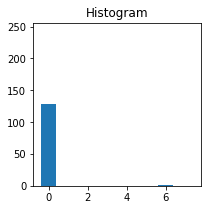

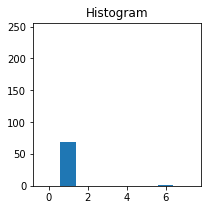

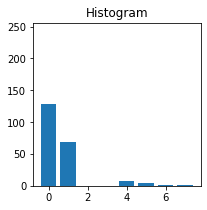

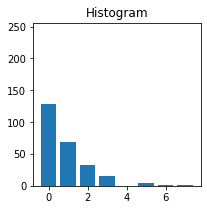

In [20]:
#histogram for base10 values
#plotting the histogram & descriptor
#descriptor array: bitcodes
#histogram array: decimals
#count = 0

for i in range(0,4):
  pixel = [0,1,2,3,4,5,6,7]#,8]
  #plt.ioff()
  fig, ax = plt.subplots( figsize=(3,3))
  #ax1.set_title('Descriptor')
  #ax1.imshow(np.reshape([bitcodes[i]], (3,3)))
  plt.title('Histogram')
  plt.ylim(0, 256)
  plt.bar(pixel, decimals[i])
  #plt.savefig("PixelHistogram%d" % count)
  #plt.close(fig)
  #count +=1

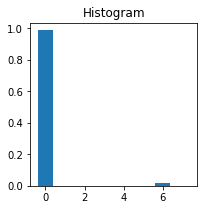

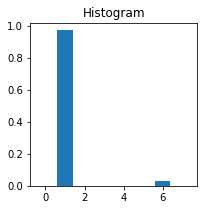

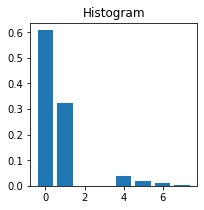

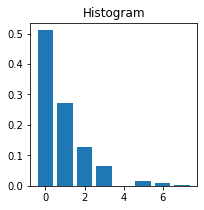

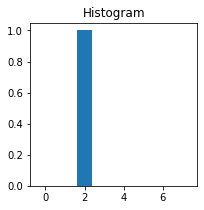

In [21]:
#normalise the histogram
#using the max value instead of the sum to normalise makes the values all between 0 and 1 instead of all add up to 1 (like when using sum)
#creating an array to save the normalised value of each intersection value
normalisedDecimals = []
#for loop to perform the calculation on each value in the list of intersectionValues
for i in decimals:
  norm = []
  for j in i:
    if max(i) == 0:
      norm.append(0)
    else:
      #calculation to normalise the value
      #norm.append(j/ max(i))
      #norm.append((j-min(i)) / (max(i) - min(i)))
      norm.append(j/sum(i))
      #adding the normalised value to the list
  normalisedDecimals.append(norm)
#plotting the normalised values 

for i in range(0,5):
  pixel = [0,1,2,3,4,5,6,7]#,8]
  fig, ax = plt.subplots(figsize=(3,3))
  ax.set_title('Histogram')
  ax.bar(pixel, normalisedDecimals[i])

In [22]:
#turning data into image
#LBP data
sumDec = []
lbpImageShape = int(np.sqrt(len(decimals)))
for i in decimals:
  x = np.sum(i)
  sumDec.append(x)
lbpImage = np.reshape(sumDec, (lbpImageShape,lbpImageShape))

#normalised LBP data
sumNormDec = []
for i in normalisedDecimals:
  x = np.sum(i)
  sumNormDec.append(x)
lbpNormImage = np.reshape(sumNormDec, (lbpImageShape,lbpImageShape))

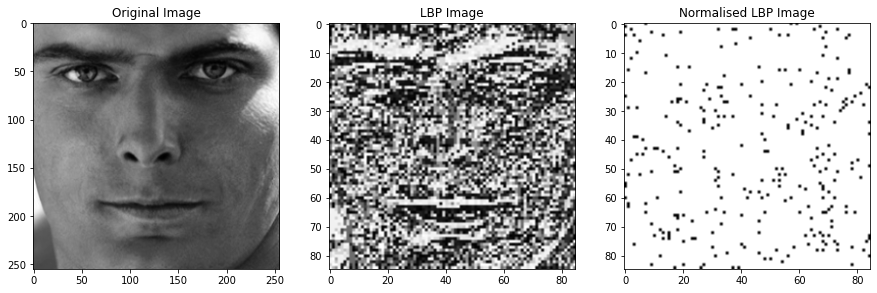

In [23]:
#showing the images
pixels = list(range(len(sumDec)))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.set_title('Original Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('LBP Image')
ax2.imshow(lbpImage, cmap='gray')
ax3.set_title('Normalised LBP Image')
ax3.imshow(lbpNormImage, cmap='gray')

In [24]:
#the LBP image is able to highlight the edges in the image
#the normalised LBP image is more so able to highlight images with less noise
#my function may have been able to pull ouut the images but its not very clear
#this may be down to how I resized the image when it was fed in
#it would be interesting to see how it would look if the image was made bigger when fed in
#if i were to do this again

<BarContainer object of 7225 artists>

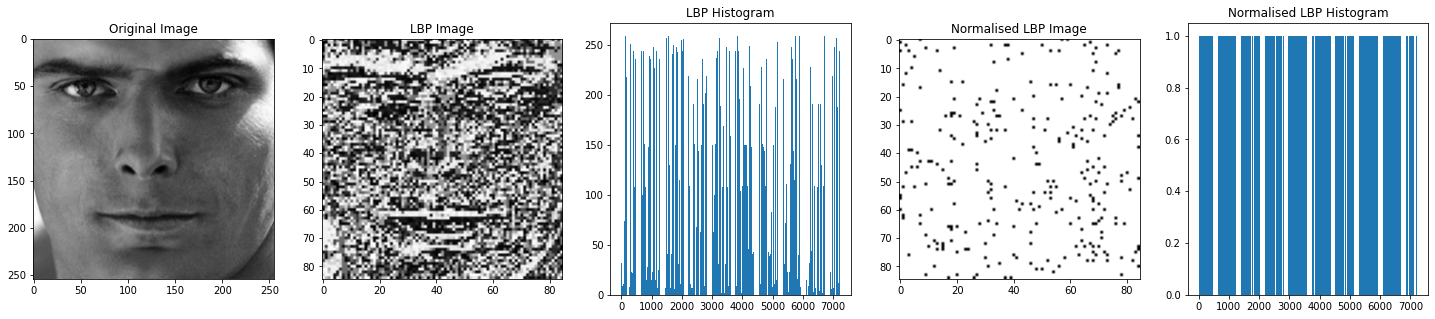

In [25]:
#showing the global histogram of the LBP & normalised LBP image
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25,5))
ax1.set_title('Original Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('LBP Image')
ax2.imshow(lbpImage, cmap='gray')
ax3.set_title('LBP Histogram')
ax3.bar(pixels, sumDec)
ax4.set_title('Normalised LBP Image')
ax4.imshow(lbpNormImage, cmap='gray')
ax5.set_title('Normalised LBP Histogram')
ax5.bar(pixels, sumNormDec)

In [26]:
#joining 'lbps' from list of binary value lists into one long binary value list to plot hist
#input = lbps (from the function output)
#lbpHist = list(np.concatenate(lbps).flat)

In [27]:
lbpHist = list(np.concatenate(decimals).flat)
#normalising them
normHist = []
for i in lbpHist:
  normHist.append(i/sum(lbpHist))#(i-min(lbpHist)) / (max(lbpHist) - min(lbpHist)))

<BarContainer object of 57800 artists>

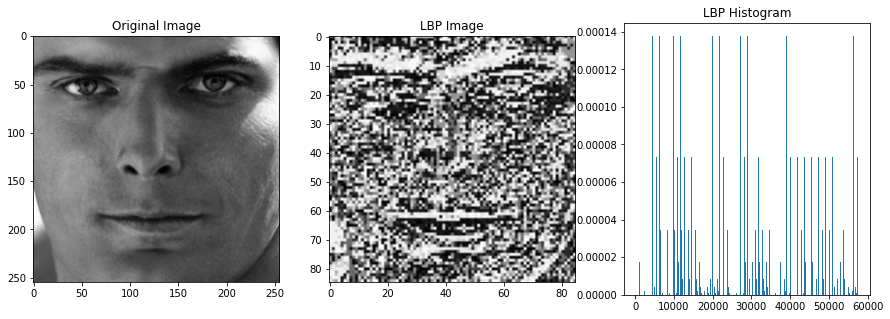

In [28]:
#plotting the histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.set_title('Original Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('LBP Image')
ax2.imshow(lbpImage, cmap='gray')
ax3.set_title('LBP Histogram')
#z = list(range(len(lbpHist)))
#ax3.bar(z, lbpHist)
z = list(range(len(normHist)))
ax3.bar(z, normHist)

In [29]:
img = cv2.resize(img, (256,256))
img.shape

(256, 256)

In [30]:
256/16

16.0

In [31]:
256/8

32.0

In [32]:
256/4

64.0

In [33]:
win = 32

In [34]:
windows = []
#go through the height in groups of 3
for i in range(0, img.shape[0], win):
  #go through the width in groups of 3
  for j in range(0, img.shape[1], win):
    #capture that 3x3 window in a variable
    window = img[i:i+win, j:j+win]
    #append that variable to the windows list
    windows.append(window)

In [35]:
len(windows)

64

In [36]:
windows[0]

array([[146.09      , 132.58138327, 134.00565889, ..., 142.7665062 ,
        142.74584099, 138.92425322],
       [136.44098805, 143.51754005, 138.31540493, ..., 146.44918287,
        144.6735613 , 142.78230045],
       [139.96323242, 148.59114411, 143.17911804, ..., 147.20169362,
        147.69957606, 147.1759019 ],
       ...,
       [129.29155273, 116.62962738, 118.48282003, ...,  25.48380167,
         28.87150184,  33.37767909],
       [127.51786746, 111.49958215, 106.90556789, ...,  25.77462074,
         29.71744993,  32.50613902],
       [123.0397145 , 104.18226655,  91.41491665, ...,  30.30330439,
         31.51238148,  33.35634027]])

In [ ]:
lbp = []
dec = []
imgBlocks = []

for w in range(0, len(windows)):
  block = windows[w]
  #print(block)
  lbps = []
  decimals = []
  normDecimals = []

  for x in range(len(block)-3):
    for y in range(len(block)-3):
      kern = block[x:(x+3), y:(y+3)]

      middleValue = kern[1,1]
      windowBitcode = []
      
      if kern[0,0] >= middleValue:
      #if the value at this coordinate is more than the central value, append a 1 to the windowBitCode list
        windowBitcode.append(1)
      elif kern[0,0] < middleValue:
        #if the value at this coordinate is less than the central value, append a 0 to the windowBitCode list
        windowBitcode.append(0)
      #top middle coordiante comparison
      if kern[0,1] >= middleValue:
        windowBitcode.append(1)
      elif kern[0,1] < middleValue:
        windowBitcode.append(0)
      #top right coordinate comparison
      if kern[0,2] >= middleValue:
        windowBitcode.append(1)
      elif kern[0,2] < middleValue:
        windowBitcode.append(0)
      #middle left coordiante comparison
      if kern[1,0] >= middleValue:
        windowBitcode.append(1)
      elif kern[1,0] < middleValue:
        windowBitcode.append(0)
      #middle right comparison
      if kern[1,2] >= middleValue:
        windowBitcode.append(1)
      elif kern[1,2] < middleValue:
        windowBitcode.append(0)
      #bottom left coordiante comparison
      if kern[2,0] >= middleValue:
        windowBitcode.append(1)
      elif kern[2,0] < middleValue:
        windowBitcode.append(0)
      #bottom middle coordiante comparison
      if kern[2,1] >= middleValue:
        windowBitcode.append(1)
      elif kern[2,1] < middleValue:
        windowBitcode.append(0)
      #bottom right coordinate comparison
      if kern[2,2] >= middleValue:
        windowBitcode.append(1)
      elif kern[2,2] < middleValue:
        windowBitcode.append(0)
      #append the windowBitCode list (of 8 boolean values) to the bitcode list
      lbps.append(windowBitcode)
    
  #getting decimal values
  base10 = [128, 68, 32, 16, 8, 4, 2, 1]
  for base2 in lbps:
    d = [b2*b10 for b2, b10 in zip(base2, base10)]
    decimals.append(np.sum(d))

  #normalise the histogram values
  for i in decimals:
    normDecimals.append(i/sum(decimals))#(i-min(decimals)) / (max(decimals) - min(decimals)))
  
  #reshaping to image
  shp = int(np.sqrt(len(decimals)))
  lbpImage = np.reshape(decimals, (shp, shp))

  #reshaping normalised image
  normShp = int(np.sqrt(len(normDecimals)))
  lbpNormImage = np.reshape(normDecimals, (normShp, normShp))  

  lbp.append(lbps)
  dec.append(decimals)
  imgBlocks.append(lbpImage)
  
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
  ax1.set_title('LBP Block Image')
  ax1.imshow(lbpImage, cmap='gray')
  ax2.set_title('LBP Block Histogram')
  x = list(range(len(decimals)))
  #ax2.bar(decimals, x)
  ax2.bar(decimals,x)
  ax3.set_title('Normalised LBP Block Histogram')
  x = list(range(len(normDecimals)))
  #ax3.bar(normDecimals, x)
  ax3.bar(normDecimals, x)
  ax4.set_title('Normalised LBP Block Image')
  ax4.imshow(lbpNormImage)


29

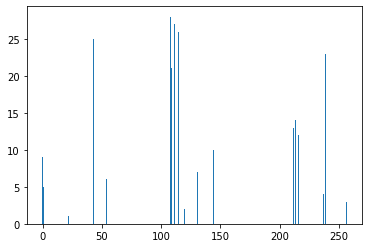

In [38]:
x = list(range(len(lbpImage[0])))
plt.bar(lbpImage[0], x)
len(lbpImage[0])

In [39]:
#making the function
def ICV_LBP(image, windowSize):
  image = cv2.resize(image, (256,256))

  windows = []
  for i in range(0, image.shape[0], windowSize):
    for j in range(0, image.shape[1], windowSize):
      window = image[i:i+windowSize, j:j+windowSize]
      windows.append(window)
  
  booleanLBP = []
  decimalLBP = []
  imageLBP = []

  for w in range(0, len(windows)):
    block = windows[w]
    bools = [] 
    decimals = []

    for x in range(len(block)-3):
      for y in range(len(block)-3):
        kern = block[x:(x+3), y:(y+3)]
        #print(kern)

        middleValue = kern[1,1]
        bitcode =[]

        if kern[0,0] >= middleValue:
          bitcode.append(1)
        elif kern[0,0] < middleValue:
          bitcode.append(0)
        if kern[0,1] >= middleValue:
          bitcode.append(1)
        elif kern[0,1] < middleValue:
          bitcode.append(0)
        if kern[0,2] >= middleValue:
          bitcode.append(1)
        elif kern[0,2] < middleValue:
          bitcode.append(0)
        if kern[1,0] >= middleValue:
          bitcode.append(1)
        elif kern[1,0] < middleValue:
          bitcode.append(0)
        if kern[1,2] >= middleValue:
          bitcode.append(1)
        elif kern[1,2] < middleValue:
          bitcode.append(0)
        if kern[2,0] >= middleValue:
          bitcode.append(1)
        elif kern[2,0] < middleValue:
          bitcode.append(0)
        if kern[2,1] >= middleValue:
          bitcode.append(1)
        elif kern[2,1] < middleValue:
          bitcode.append(0)
        if kern[2,2] >= middleValue:
          bitcode.append(1)
        elif kern[2,2] < middleValue:
          bitcode.append(0)
        bools.append(bitcode)

    base10 = [128, 68, 32, 16, 8, 4, 2, 1]
    for base2 in bools:
      d = [b2*b10 for b2, b10 in zip(base2, base10)]
      decimals.append(np.sum(d))
    decimalLBP.append(decimals)

  return decimalLBP

<BarContainer object of 53824 artists>

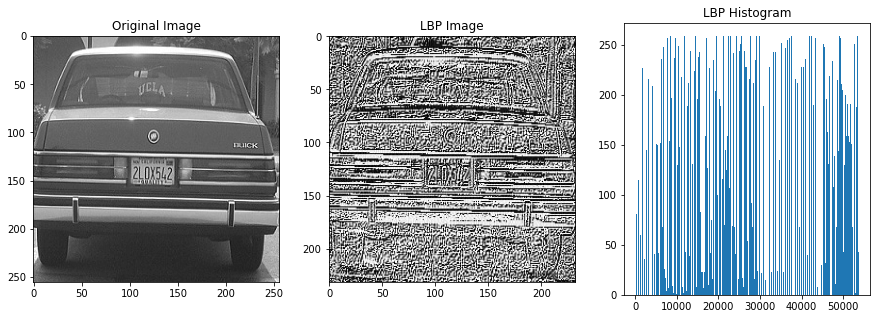

In [40]:
f1 = cv2.imread("car-1.jpg")
f1 = f1[:,:,::-1]
f1 = np.dot(f1[...,:3], [0.3, 0.59, 0.11]) 
face1 = ICV_LBP(f1, 32)

blocks = []
shape = int(np.sqrt(len(face1[0])))

for i in face1:
  block = np.reshape(i, (shape,shape))
  blocks.append(block)

  normHist = []
  for j in i:
    normHist.append(j/sum(i))#(j-min(i)) / (max(i) - min(i)))

lbpFace1 = np.asarray(blocks)
a1 = np.hstack(lbpFace1[0:0+8])
for i in range(8, len(lbpFace1), 8):
  b1 = np.hstack(lbpFace1[i:i+8])
  a1 = np.vstack((a1, b1))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5)) 
ax1.set_title('Original Image')
ax1.imshow(f1, cmap='gray')
ax2.set_title('LBP Image')
ax2.imshow(a1, cmap='gray')
ax3.set_title('LBP Histogram')
face1hist = (a1.flatten()).flatten()
x = list(range(len(face1hist)))
ax3.bar(x,face1hist)

In [41]:
f1 = cv2.imread("face-1.jpg")
f1 = f1[:,:,::-1]
f1 = np.dot(f1[...,:3], [0.3, 0.59, 0.11]) 

In [42]:
face1 = ICV_LBP(f1, 32)

<ipython-input-60-1532d58791cb>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))


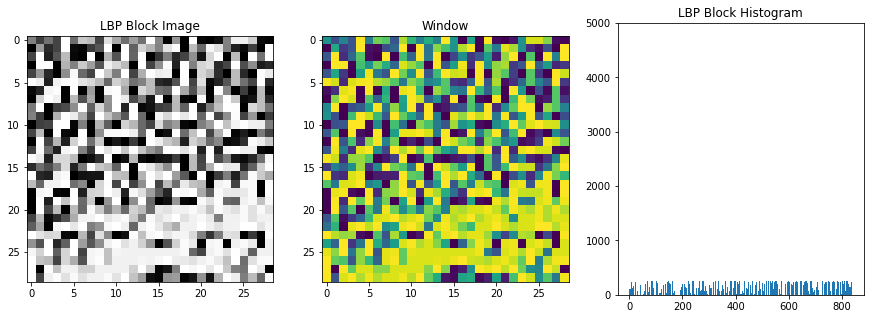

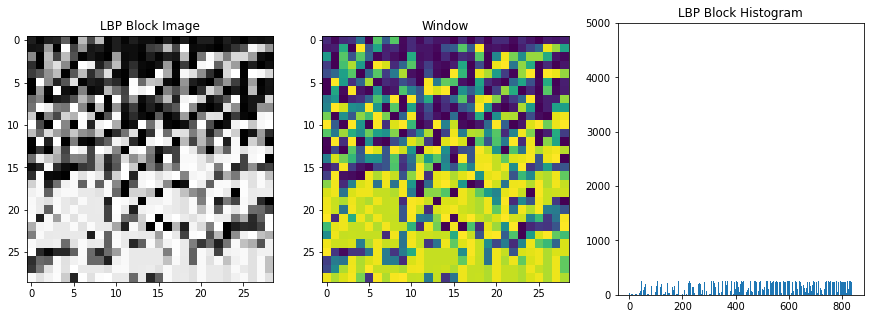

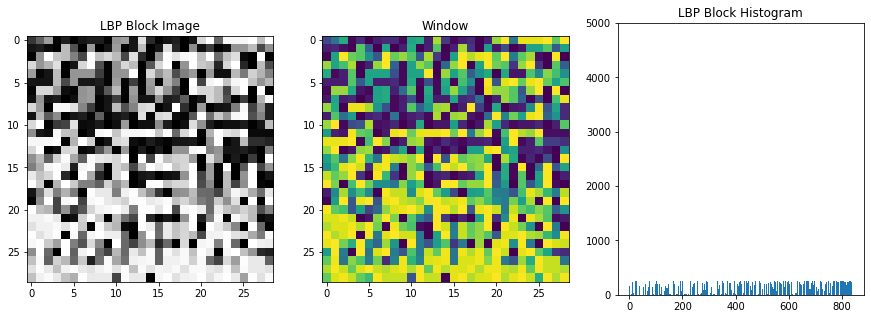

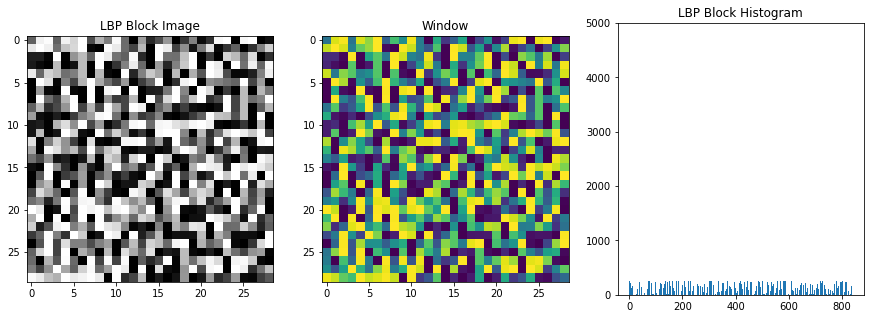

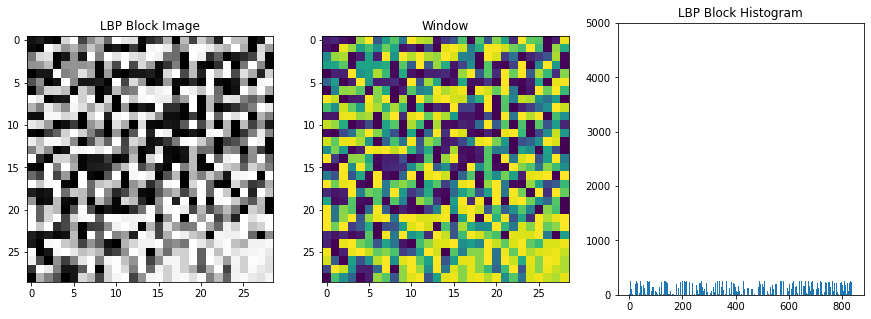

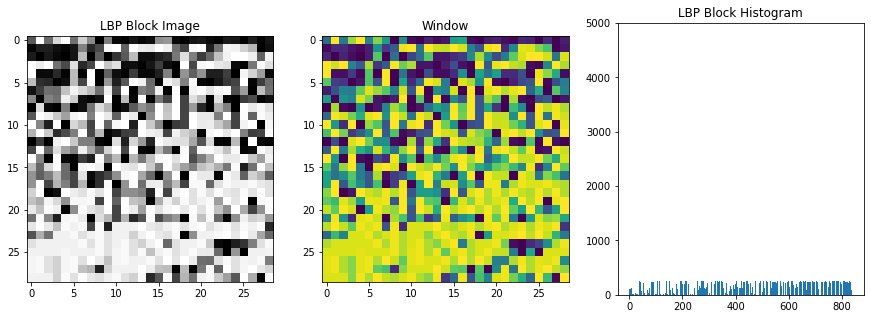

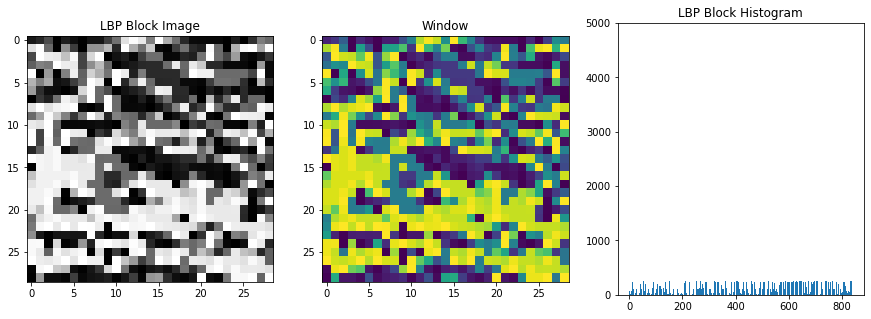

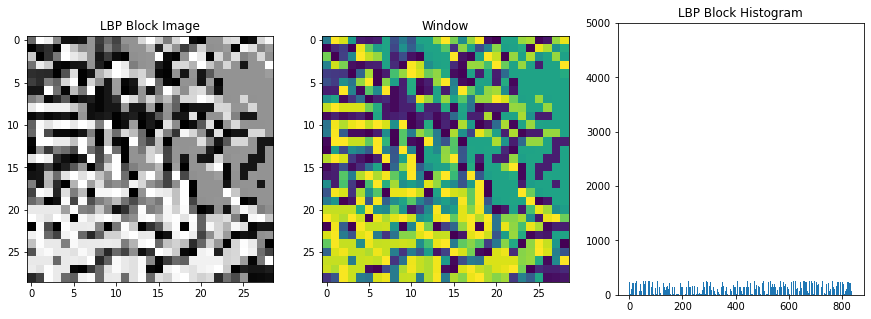

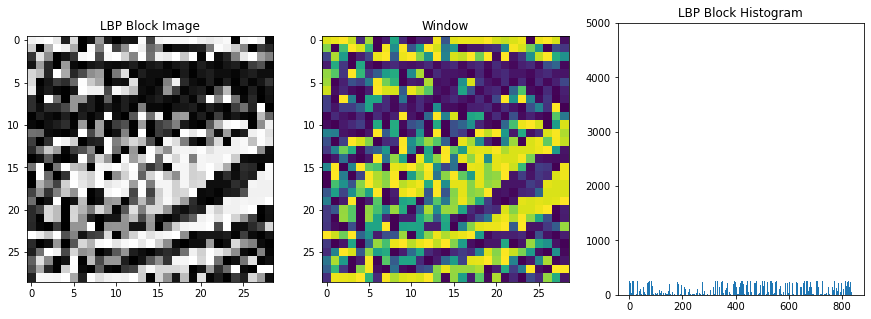

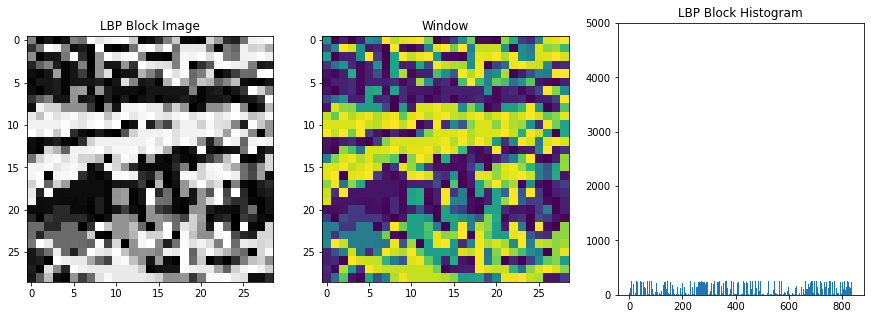

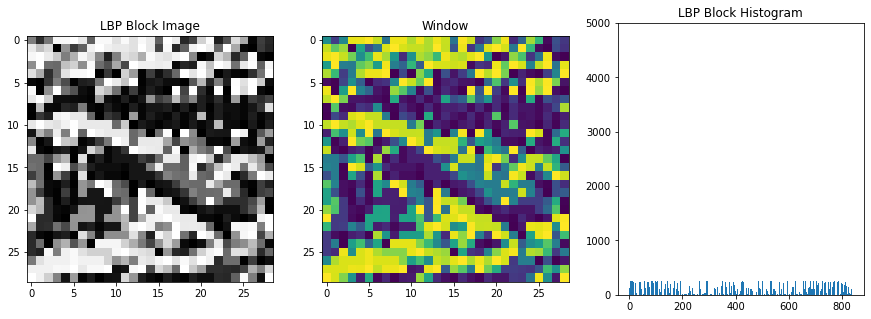

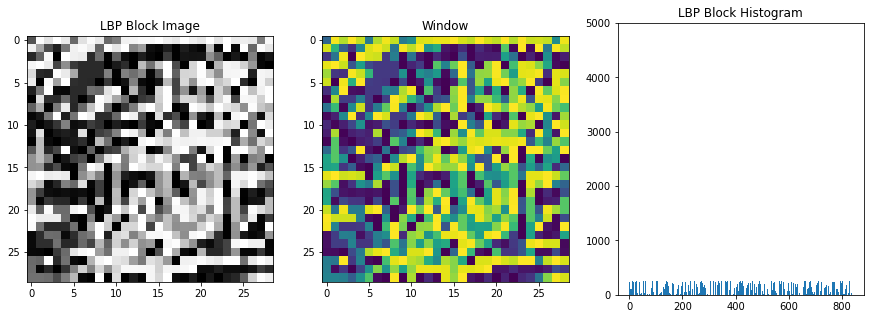

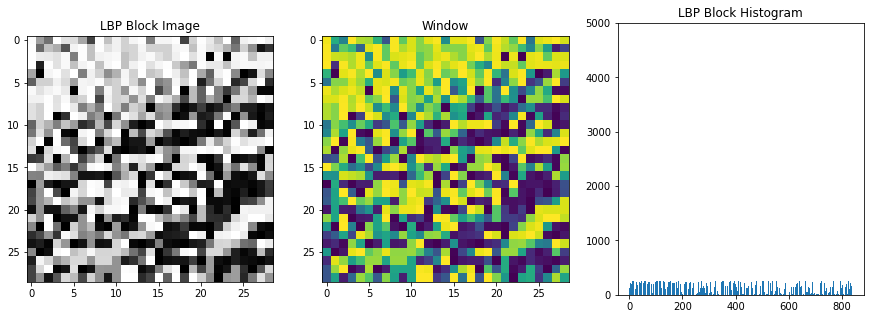

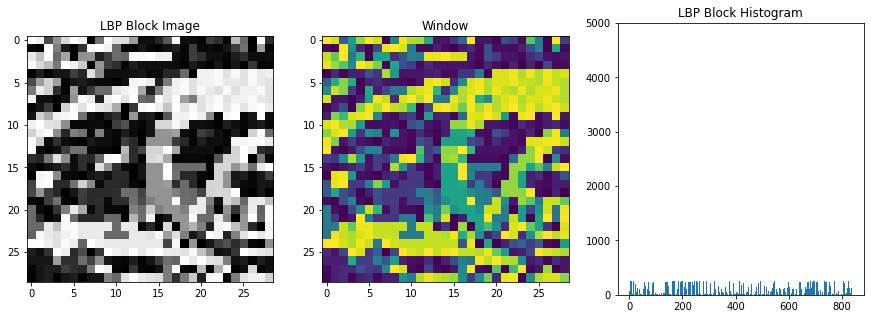

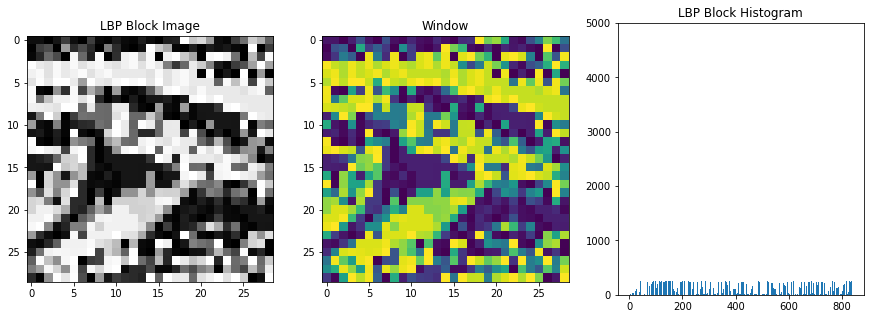

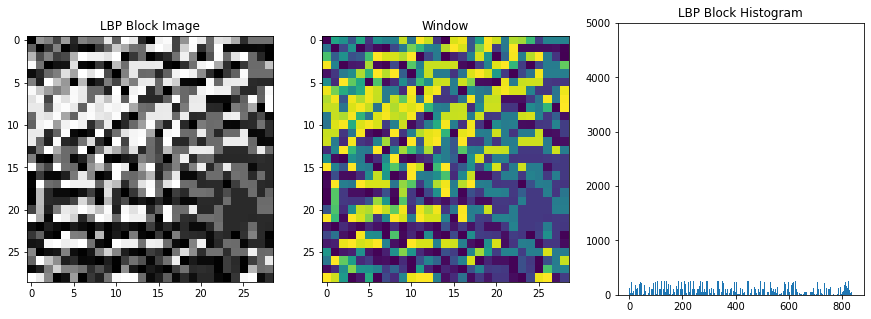

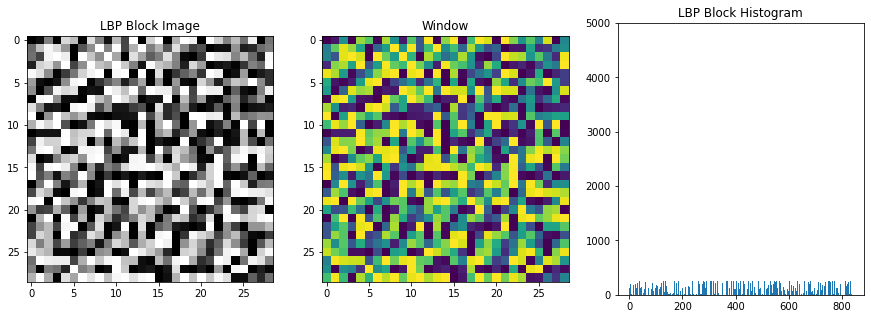

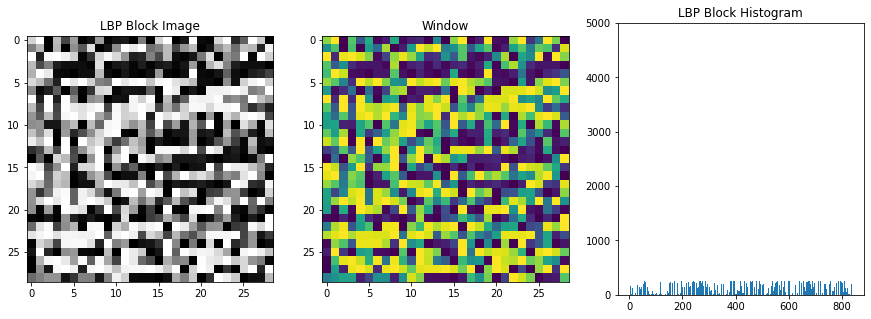

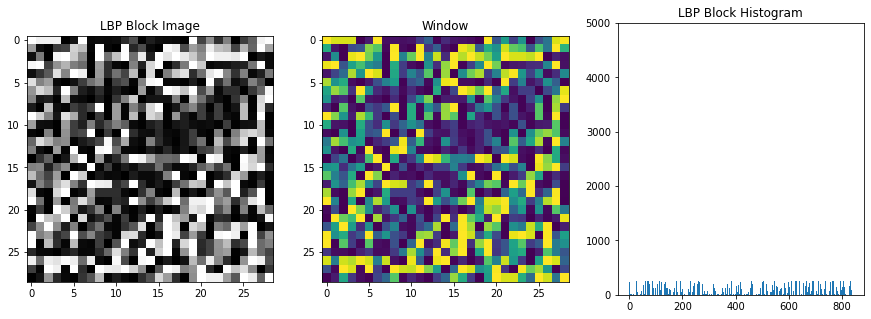

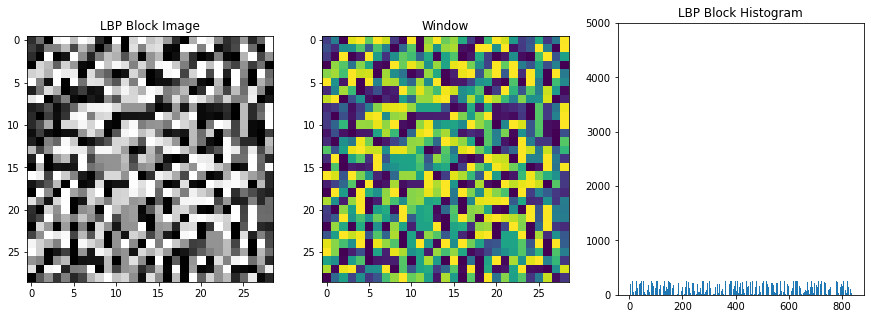

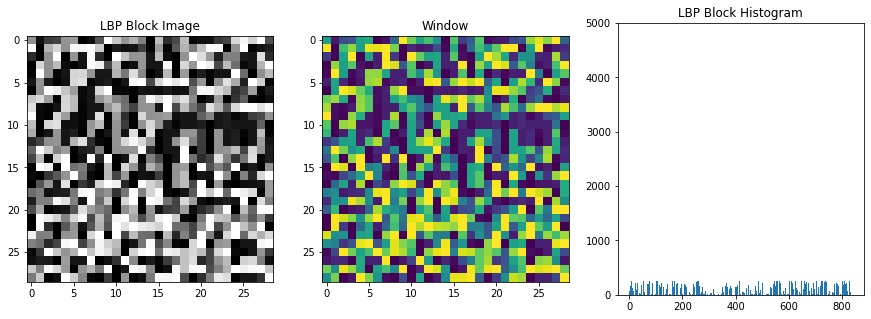

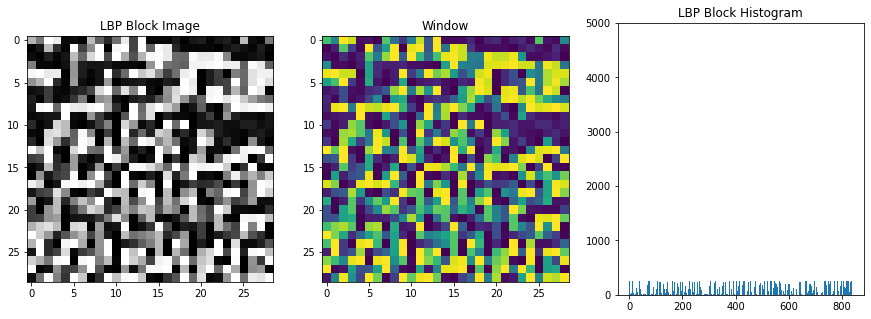

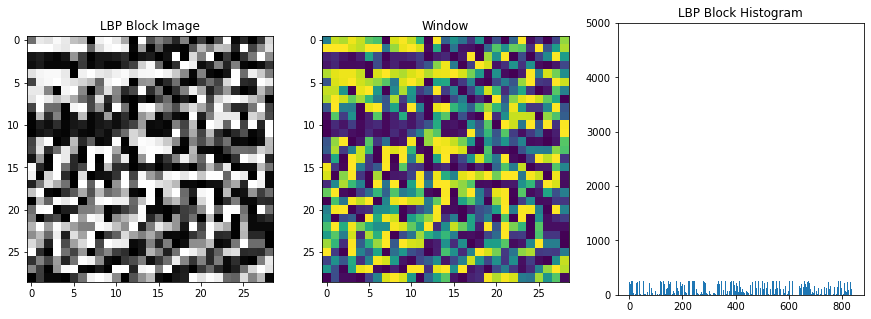

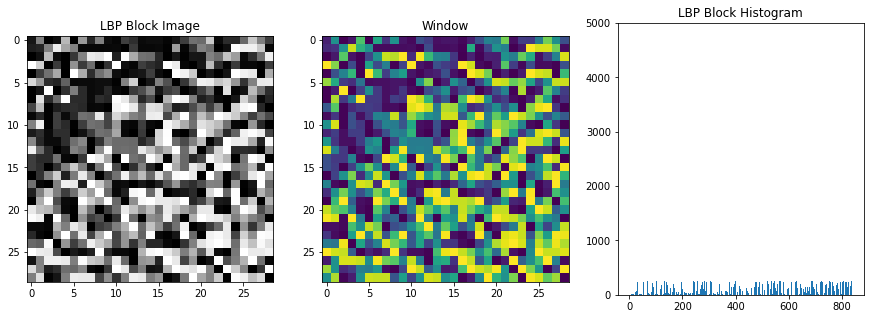

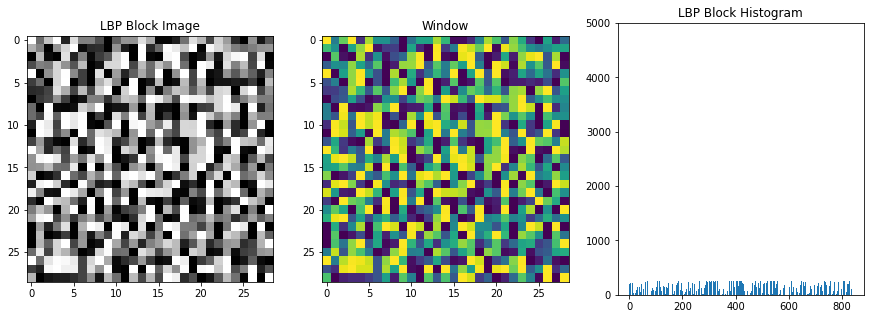

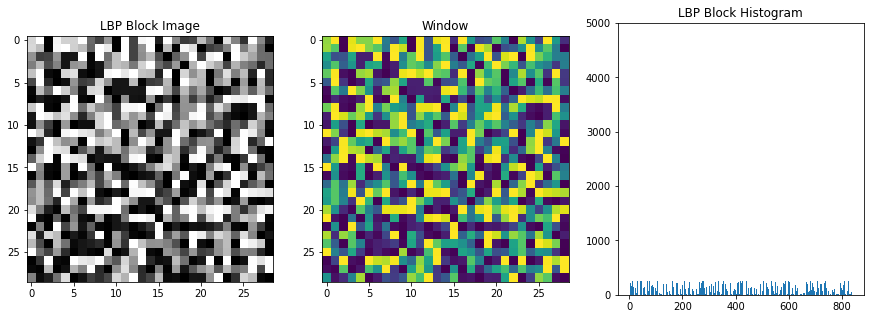

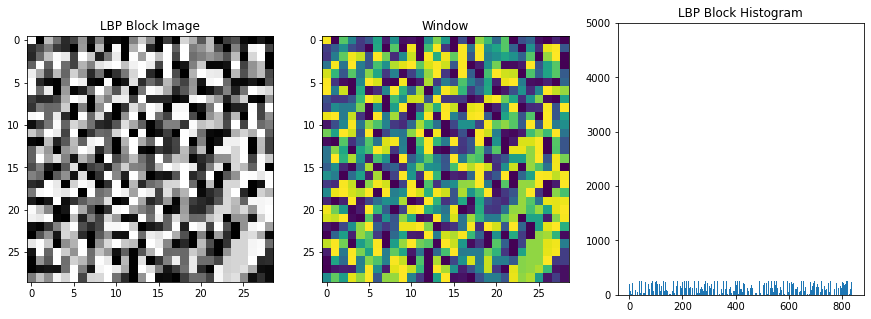

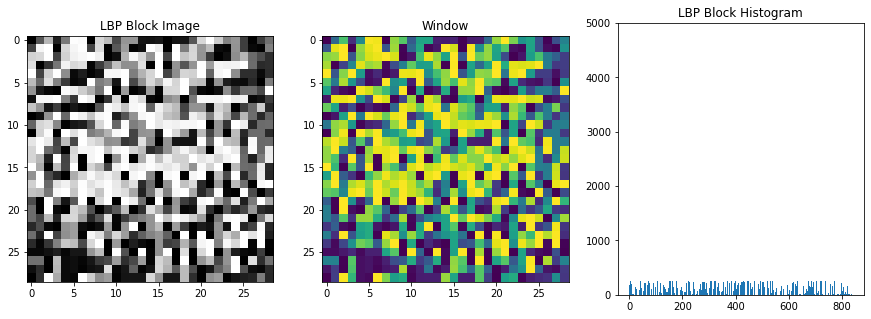

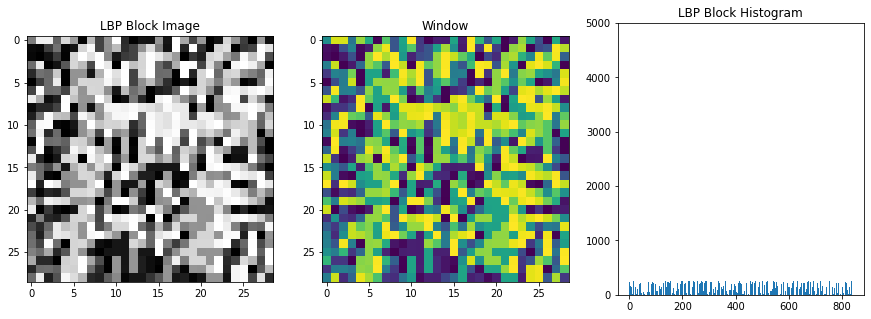

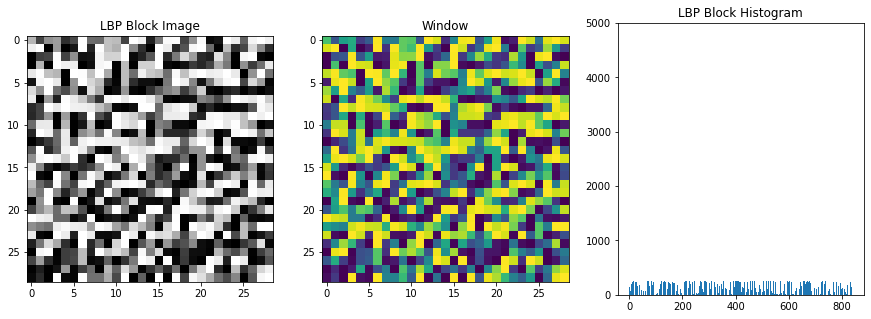

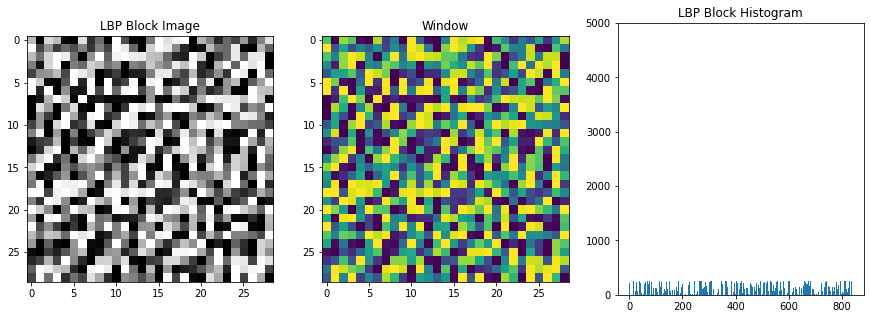

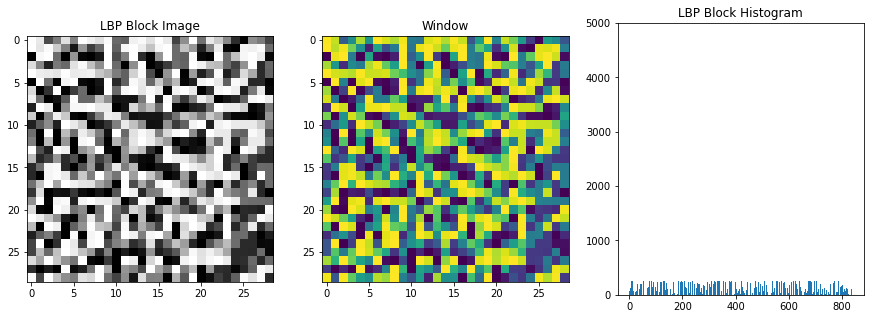

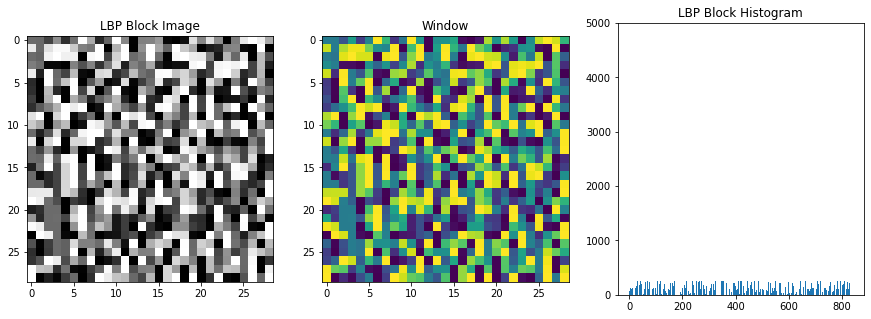

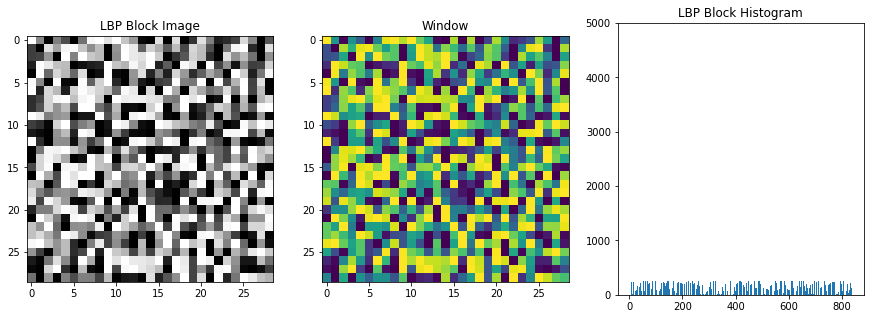

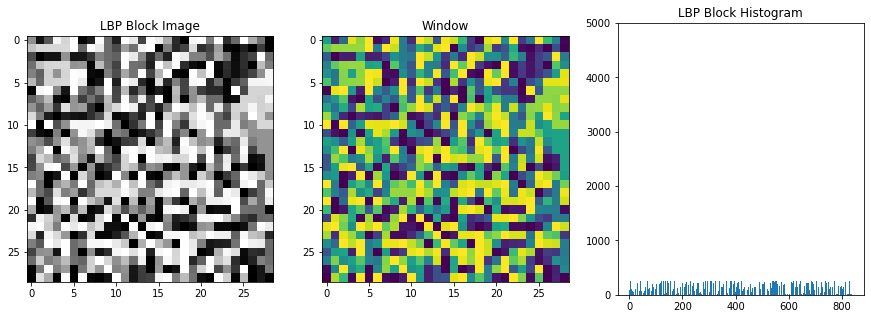

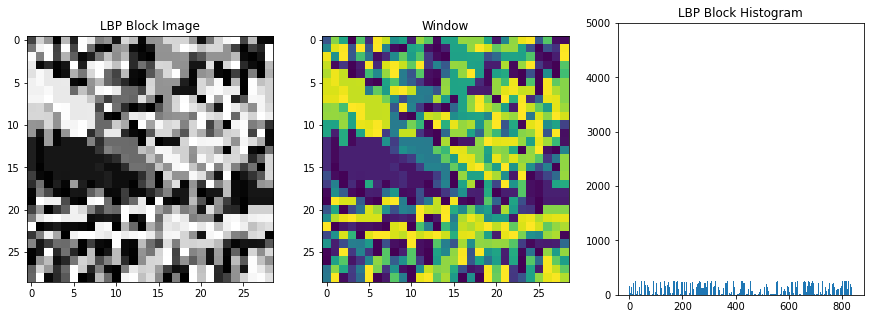

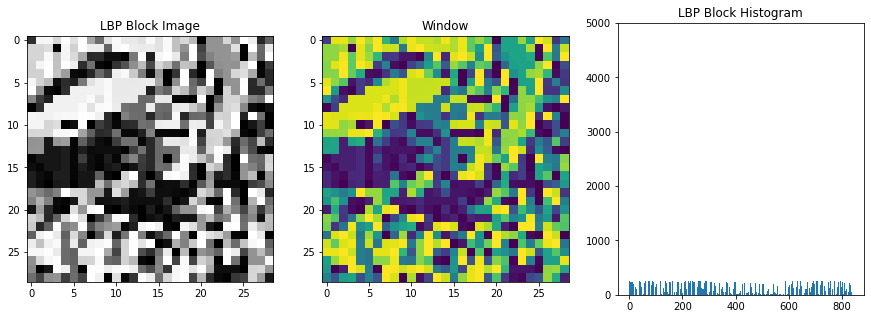

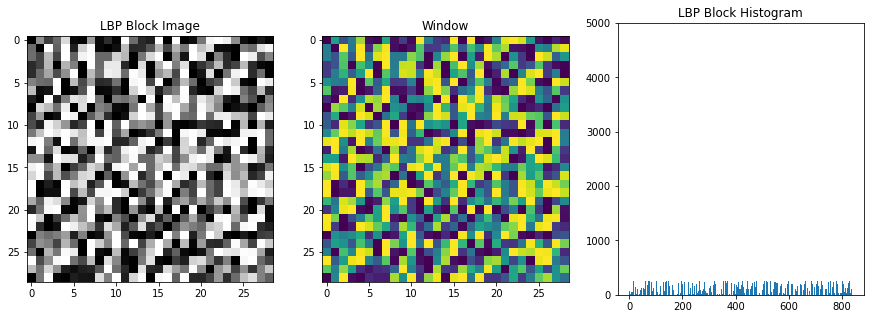

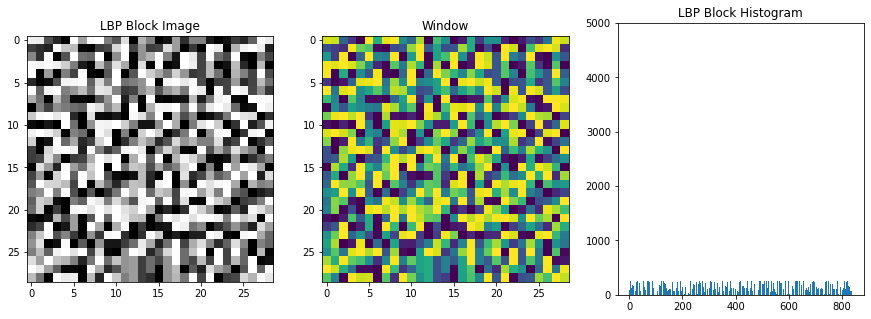

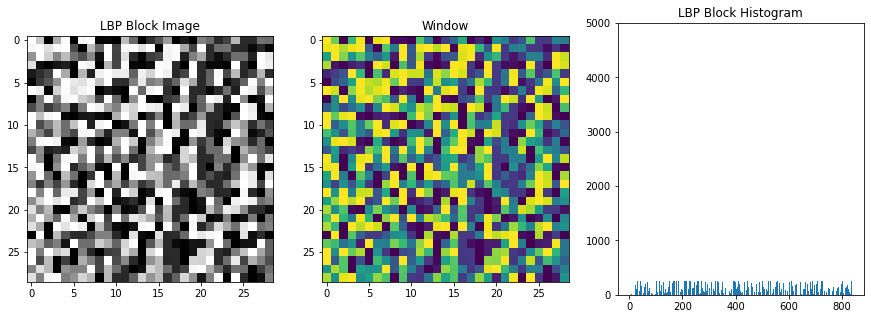

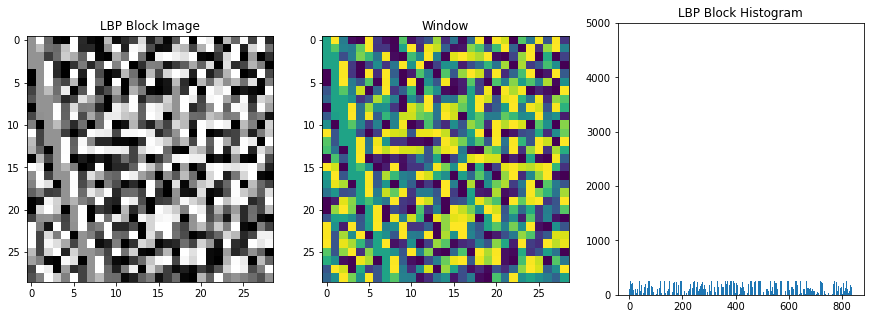

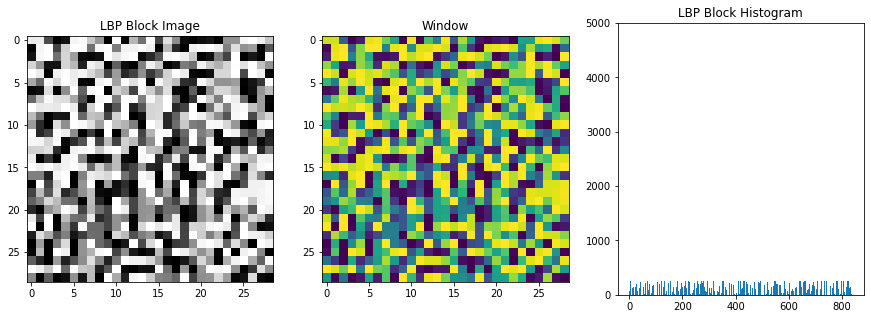

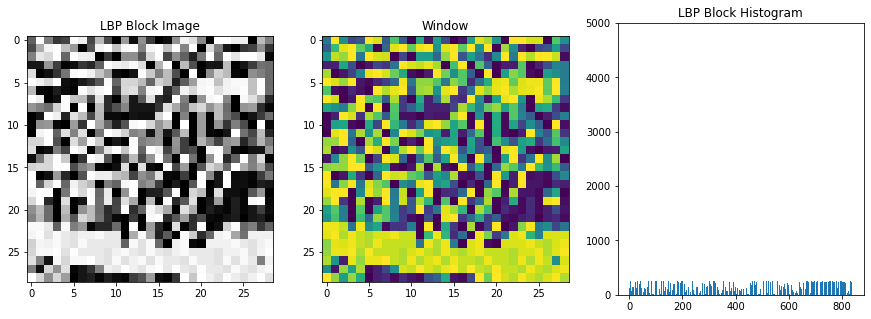

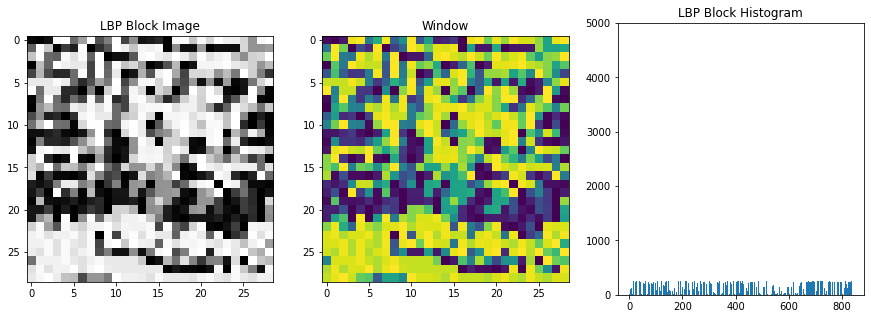

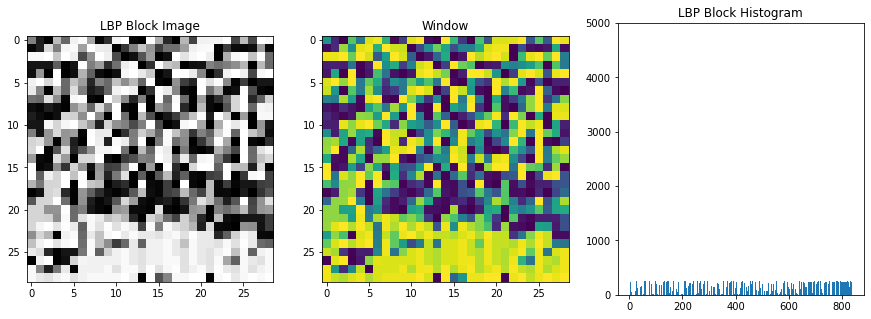

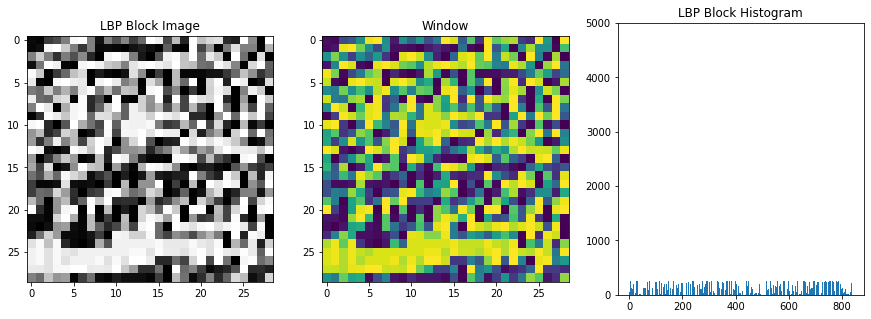

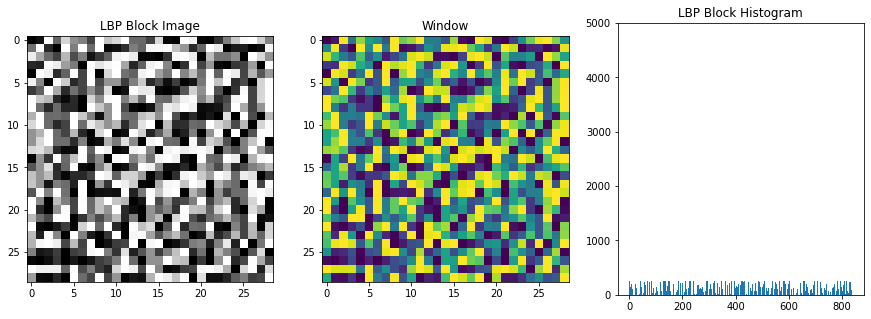

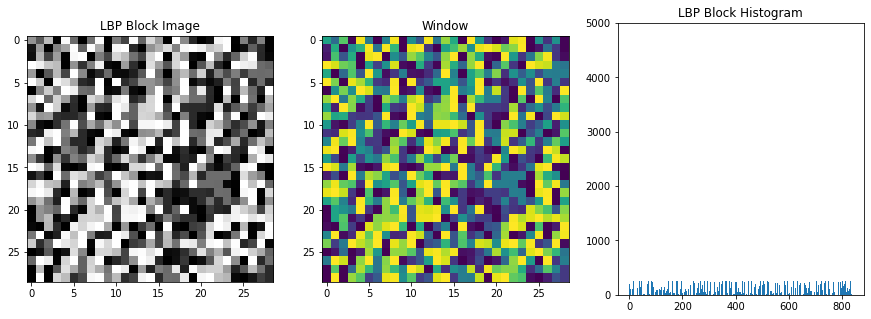

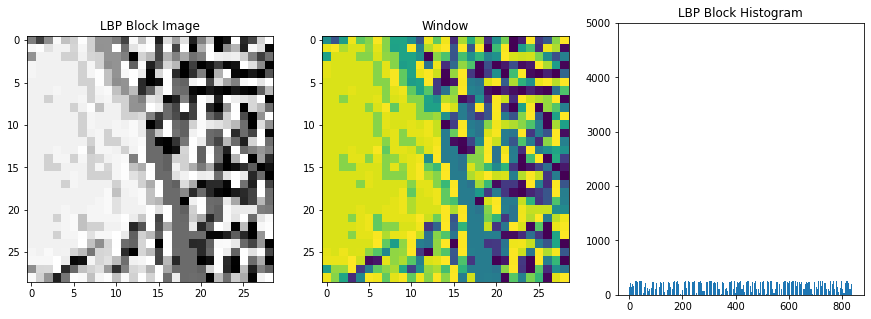

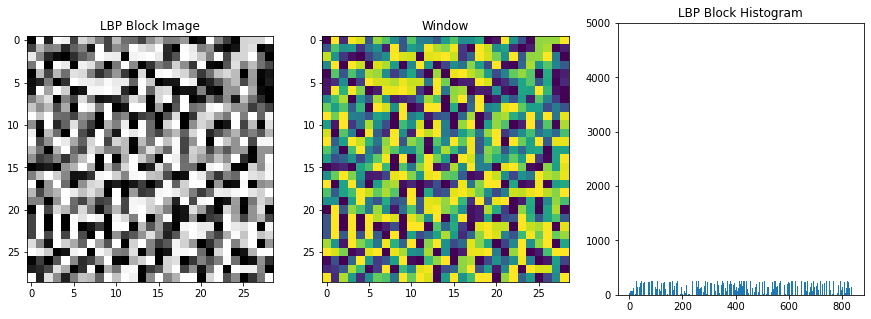

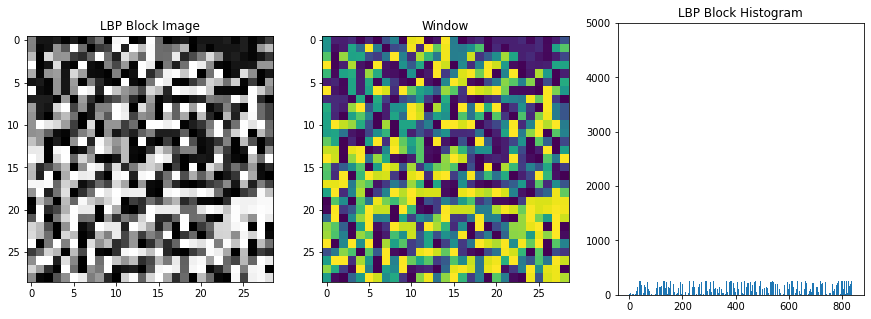

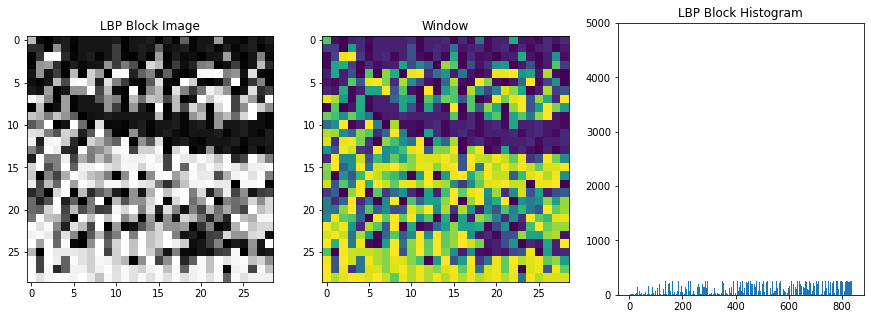

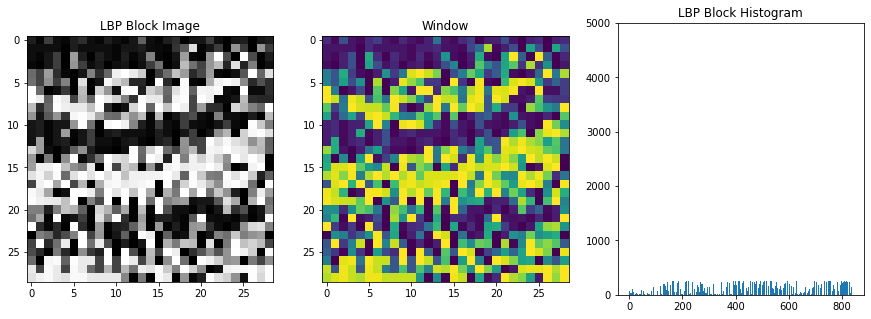

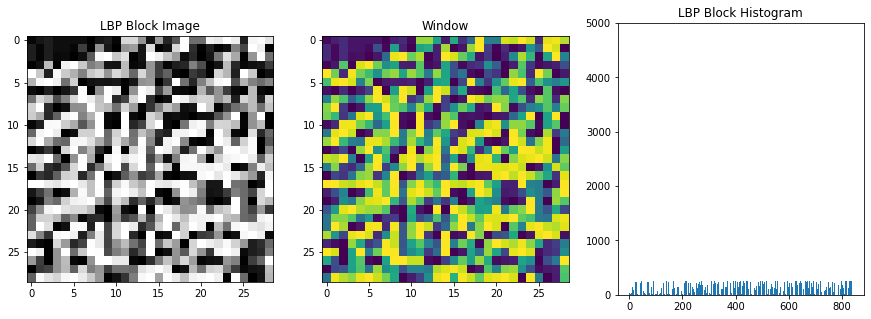

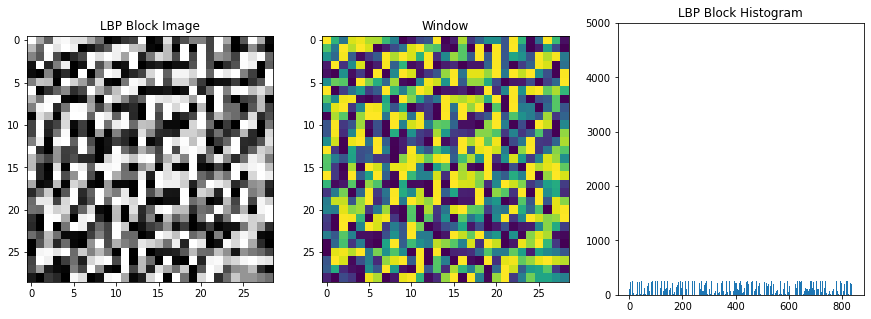

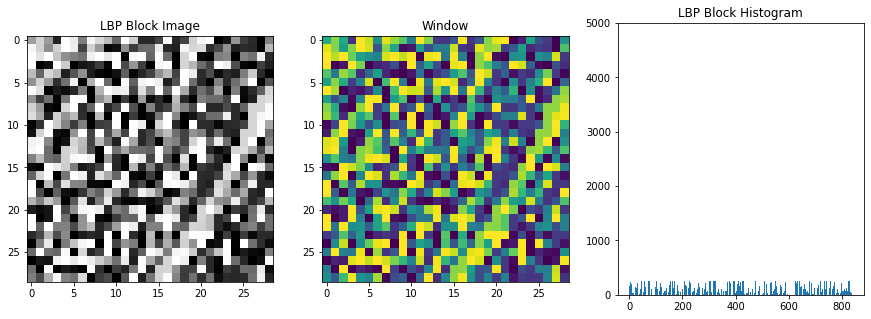

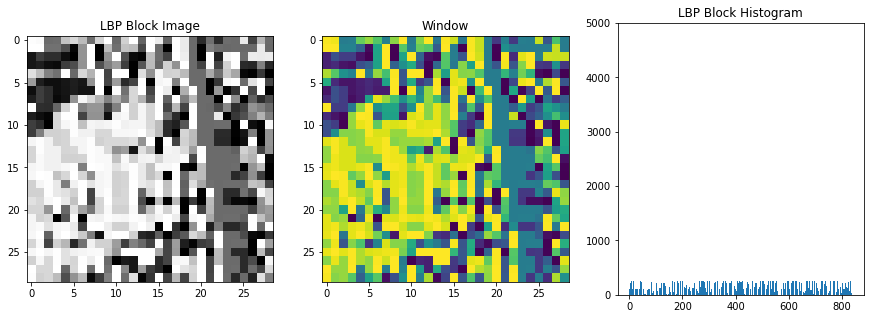

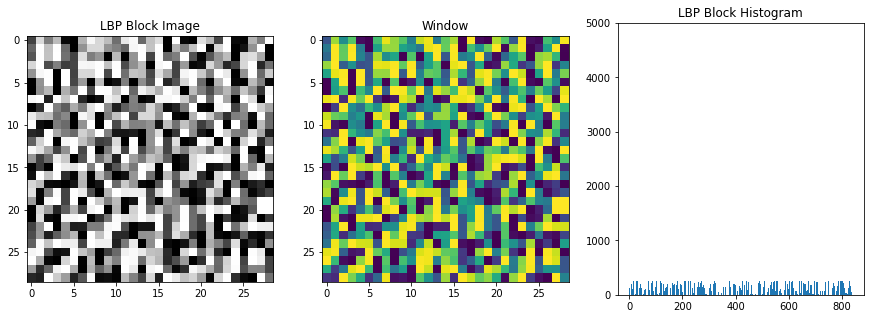

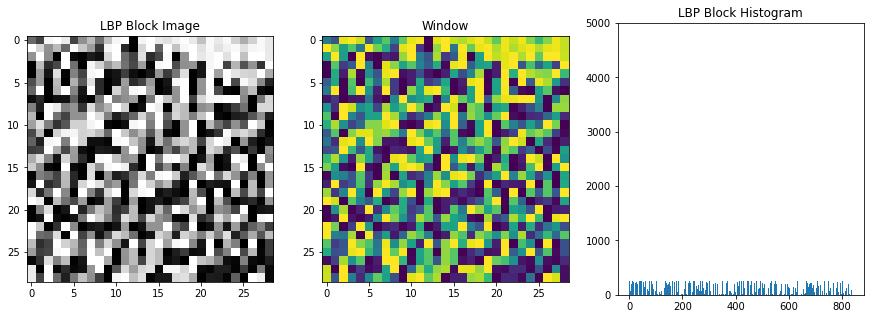

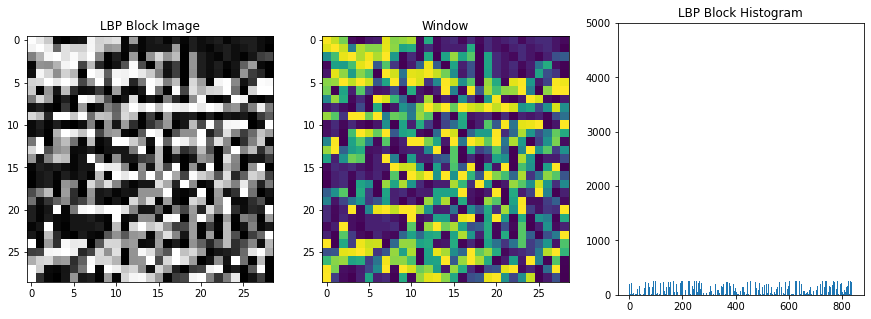

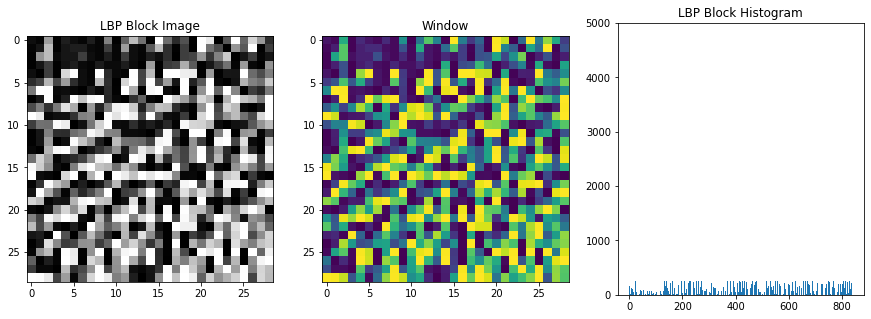

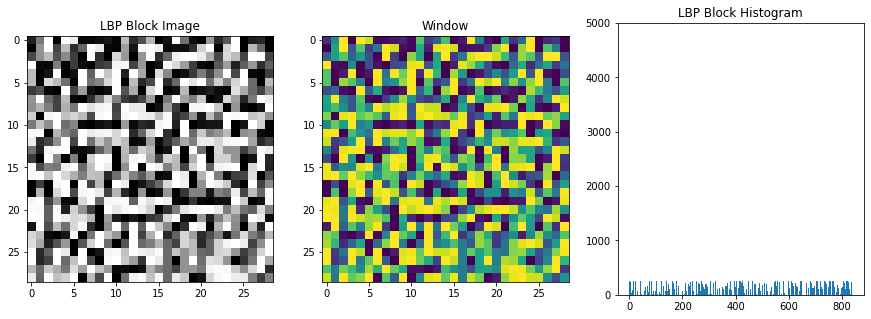

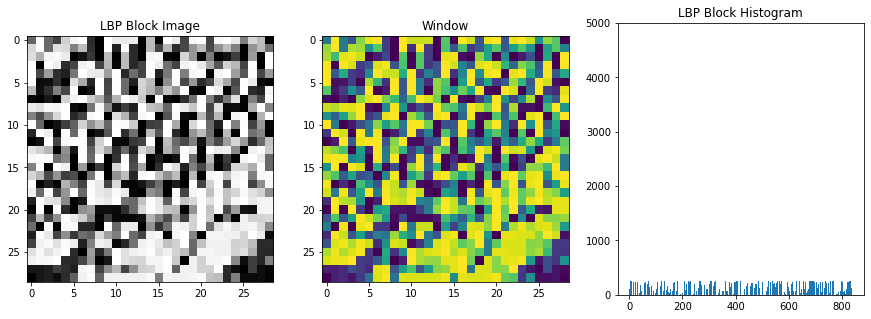

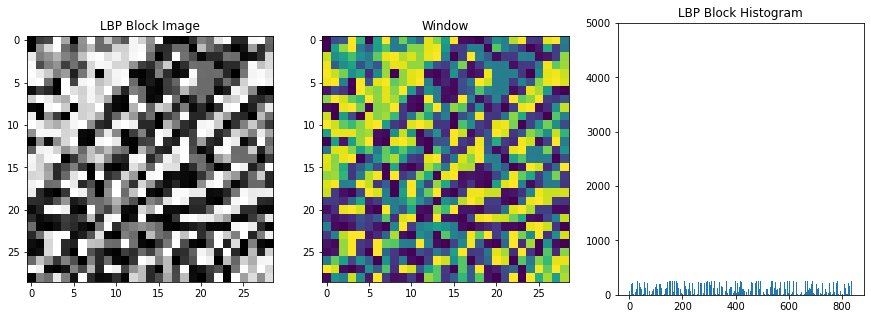

In [60]:
#turning the blocks into images
blocks = []
shape = int(np.sqrt(len(face1[0])))

for i in face1:
  block = np.reshape(i, (shape,shape))
  blocks.append(block)

  normHist = []
  for j in i:
    normHist.append(j/sum(i))#(j-min(i)) / (max(i) - min(i)))

  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5)) 
  ax1.set_title('LBP Block Image')
  ax1.imshow(block, cmap='gray')
  ax2.set_title('Window')
  ax2.imshow(block)
  ax3.set_title('LBP Block Histogram')
  ax3.set_ylim(0,5000)
  a = list(range(len(i)))
  ax3.bar(a, i)
  #b = list(range(len(normHist)))
  #ax3.bar(b, normHist)

####B) Come up with a descriptor that represents the whole image as consisting of multiple windows. For example, you could combine several local descriptions into a global description by concatenation. Discuss in the report alternative approaches. Using the global descriptor you created, implement a classification process that separates the images in the dataset into two categories: face images and non-face images (for example, you could use histogram similarities). Comment the results in the report. Is the global descriptor able to represent whole images of different types (e.g. faces vs. cars)? Identify problems (if any), discuss them in the report and suggest possible solutions.

<BarContainer object of 53824 artists>

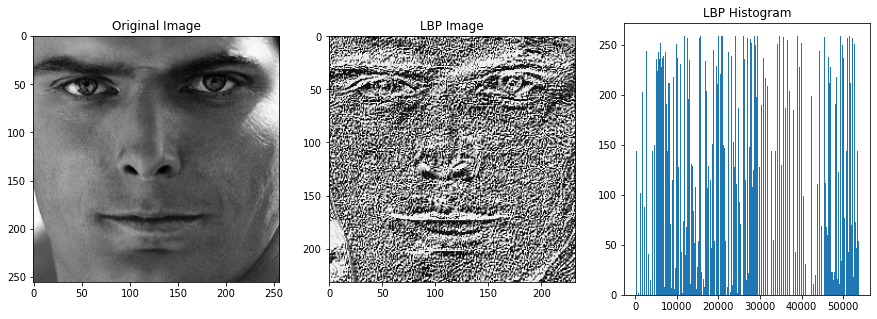

In [44]:
#stitching image back together
lbpFace1 = np.asarray(blocks)
a1 = np.hstack(lbpFace1[0:0+8])
for i in range(8, len(lbpFace1), 8):
  b1 = np.hstack(lbpFace1[i:i+8])
  a1 = np.vstack((a1, b1))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5)) 
ax1.set_title('Original Image')
ax1.imshow(f1, cmap='gray')
ax2.set_title('LBP Image')
ax2.imshow(a1, cmap='gray')
ax3.set_title('LBP Histogram')
face1hist = (a1.flatten()).flatten()
x = list(range(len(face1hist)))
ax3.bar(x,face1hist)

In [45]:
#reading in other images and getting their image & histogram

#face-2.jpg
f2 = cv2.imread("face-2.jpg")
f2 = f2[:,:,::-1]
f2 = np.dot(f2[...,:3], [0.3, 0.59, 0.11]) 
face2 = ICV_LBP(f2, 32)

f2blocks = []
shape = int(np.sqrt(len(face2[0])))

for i in face2:
  block = np.reshape(i, (shape,shape))
  f2blocks.append(block)

  f2normHist = []
  for j in i:
    f2normHist.append(j/sum(i))#(j-min(i)) / (max(i) - min(i)))

lbpFace2 = np.asarray(f2blocks)
a2 = np.hstack(lbpFace2[0:0+8])
for i in range(8, len(lbpFace2), 8):
  b2 = np.hstack(lbpFace2[i:i+8])
  a2 = np.vstack((a2, b2))

#face-3.jpg
f3 = cv2.imread("face-3.jpg")
f3 = f3[:,:,::-1]
f3 = np.dot(f3[...,:3], [0.3, 0.59, 0.11]) 
face3 = ICV_LBP(f3, 32)

f3blocks = []
shape = int(np.sqrt(len(face3[0])))

for i in face3:
  block = np.reshape(i, (shape,shape))
  f3blocks.append(block)

  f3normHist = []
  for j in i:
    f3normHist.append(j/sum(i))#(j-min(i)) / (max(i) - min(i)))

lbpFace3 = np.asarray(f3blocks)
a3 = np.hstack(lbpFace3[0:0+8])
for i in range(8, len(lbpFace3), 8):
  b3 = np.hstack(lbpFace3[i:i+8])
  a3 = np.vstack((a3, b3))

#car-1.jpg
c1 = cv2.imread("car-1.jpg")
c1 = c1[:,:,::-1]
c1 = np.dot(c1[...,:3], [0.3, 0.59, 0.11]) 
car1 = ICV_LBP(c1, 32)

c1blocks = []
shape = int(np.sqrt(len(car1[0])))

for i in car1:
  block = np.reshape(i, (shape,shape))
  c1blocks.append(block)

  c1normHist = []
  for j in i:
    c1normHist.append(j/sum(i))#(j-min(i)) / (max(i) - min(i)))

lbpCar1 = np.asarray(c1blocks)
a4 = np.hstack(lbpCar1[0:0+8])
for i in range(8, len(lbpCar1), 8):
  b4 = np.hstack(lbpCar1[i:i+8])
  a4 = np.vstack((a4, b4))

#car-2.jpg
c2 = cv2.imread("car-2.jpg")
c2 = c2[:,:,::-1]
c2 = np.dot(c2[...,:3], [0.3, 0.59, 0.11]) 
car2 = ICV_LBP(c2, 32)

c2blocks = []
shape = int(np.sqrt(len(car2[0])))

for i in car2:
  block = np.reshape(i, (shape,shape))
  c2blocks.append(block)

  c2normHist = []
  for j in i:
    c2normHist.append(j/sum(i))#(j-min(i)) / (max(i) - min(i)))

lbpCar2 = np.asarray(c2blocks)
a5 = np.hstack(lbpCar2[0:0+8])
for i in range(8, len(lbpCar2), 8):
  b5 = np.hstack(lbpCar2[i:i+8])
  a5 = np.vstack((a5, b5))

#car-3.jpg
c3 = cv2.imread("car-3.jpg")
c3 = c3[:,:,::-1]
c3 = np.dot(c3[...,:3], [0.3, 0.59, 0.11]) 
car3 = ICV_LBP(c3, 32)

c3blocks = []
shape = int(np.sqrt(len(car3[0])))

for i in car3:
  block = np.reshape(i, (shape,shape))
  c3blocks.append(block)

  c3normHist = []
  for j in i:
    c3normHist.append(j/sum(i))#(j-min(i)) / (max(i) - min(i)))

lbpCar3 = np.asarray(c3blocks)
a6 = np.hstack(lbpCar3[0:0+8])
for i in range(8, len(lbpCar3), 8):
  b6 = np.hstack(lbpCar3[i:i+8])
  a6 = np.vstack((a6, b6))

<BarContainer object of 53824 artists>

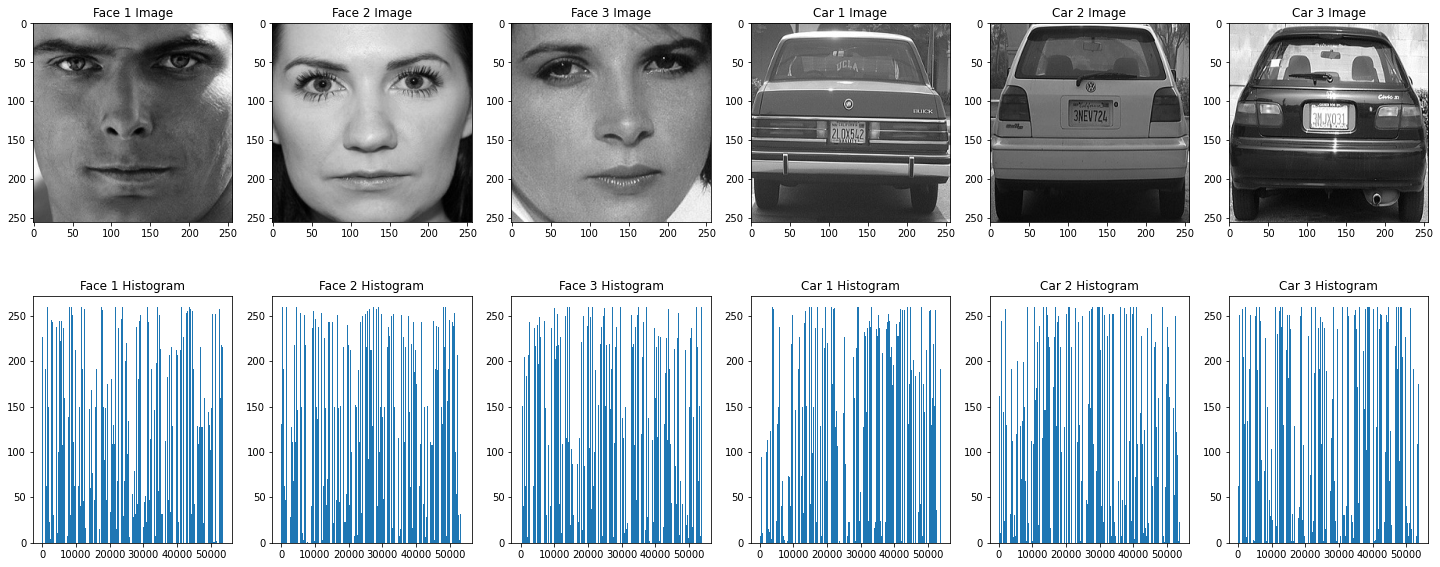

In [46]:
#showing images and their histograms
fig, axs = plt.subplots(2, 6, figsize=(25,10)) 

axs[0,0].set_title('Face 1 Image')
axs[0,0].imshow(f1, cmap='gray')
axs[1,0].set_title('Face 1 Histogram')
face1hist = (a1.flatten()).flatten()
x1 = list(range(len(face1hist)))
axs[1,0].bar(x1,face1hist)

axs[0,1].set_title('Face 2 Image')
axs[0,1].imshow(f2, cmap='gray')
axs[1,1].set_title('Face 2 Histogram')
face2hist = (a2.flatten()).flatten()
x2 = list(range(len(face2hist)))
axs[1,1].bar(x2,face2hist)

axs[0,2].set_title('Face 3 Image')
axs[0,2].imshow(f3, cmap='gray')
axs[1,2].set_title('Face 3 Histogram')
face3hist = (a3.flatten()).flatten()
x3 = list(range(len(face3hist)))
axs[1,2].bar(x3,face3hist)

axs[0,3].set_title('Car 1 Image')
axs[0,3].imshow(c1, cmap='gray')
axs[1,3].set_title('Car 1 Histogram')
car1hist = (a4.flatten()).flatten()
x4 = list(range(len(car1hist)))
axs[1,3].bar(x4,car1hist)

axs[0,4].set_title('Car 2 Image')
axs[0,4].imshow(c2, cmap='gray')
axs[1,4].set_title('Car 2 Histogram')
car2hist = (a5.flatten()).flatten()
x5 = list(range(len(car2hist)))
axs[1,4].bar(x5,car2hist)

axs[0,5].set_title('Car 3 Image')
axs[0,5].imshow(c3, cmap='gray')
axs[1,5].set_title('Car 3 Histogram')
car3hist = (a6.flatten()).flatten()
x6 = list(range(len(car3hist)))
axs[1,5].bar(x6,car3hist)

In [47]:
#https://stats.stackexchange.com/questions/184101/comparing-two-histograms-using-chi-square-distance
#https://www.youtube.com/watch?v=XjCPUkYc62Q&ab_channel=BrendonFerullo
#chi squared comparison?

In [48]:
#initially I was thinking of building a function similar to q3 to compare the intersection of the histograms but after some desk research,
#i found that chi squared is an ample methodolgy to use to compare histograms

In [49]:
#testing chi squared comparisons

#f1 & f2
for a, b in zip(normHist, f2normHist):
  f1f2 =  0.5 * (np.sum(((a-b) ** 2) / (a+b+1e-10)))
print("f1 & f2:", f1f2)

#f1 & c1
for a, b in zip(normHist, c1normHist):
  f1c1 =  0.5 * (np.sum(((a-b) ** 2) / (a+b+1e-10)))
print("f1 & c1:", f1c1)

f1 & f2: 1.2636986399404056e-09
f1 & c1: 0.0006985753832709461


In [50]:
#the calculation shows the distance from the image its compared to
#making it into a function

def ICV_chi2distance(hist1, hist2):

  epochs = 1e-10

  for a, b in zip(hist1, hist2):
    distance = 0.5 * (np.sum(((a-b) ** 2) / (a+b+epochs)))

  return distance

In [51]:
#creating a dataframe to store the data

#creating the dictionary for the data
data = {
    #adding image name
    "Image" : ['face-1', 'face-2', 'face-3', 'car-1', 'car-2', 'car-3'],
    #adding histogram data
    "Histogram" : [normHist, f2normHist, f3normHist, c1normHist, c2normHist, c3normHist],
}

#converting into datafram
imageData = pd.DataFrame(data)

imageData

,Image,Histogram
0,face-1,"[1.8912350710631578e-05, 0.0005862828720295789..."
1,face-2,"[0.0, 0.001812253814835656, 0.0013157459203601..."
2,face-3,"[0.002165012352792255, 0.0022435813494661675, ..."
3,car-1,"[0.0023386072294722254, 5.774338838203026e-05,..."
4,car-2,"[0.0022288712544989374, 9.539915875287281e-05,..."
5,car-3,"[1.9087065649962302e-05, 0.0005821555023238503..."


In [52]:
#iterating through arrays in histogram column in df
chi2distance = []
classification = []

for i in imageData["Histogram"]:
  #running the histogram through chi2distance function
  chi2dist = ICV_chi2distance(normHist, i)
  
  #save the returned value to the relevant column
  chi2distance.append(round(chi2dist,5))

  #adding classification to df depending on chi2dist value
  if chi2dist > 0.1:
    classification.append("Non-Face")
  elif chi2dist < 0.1:
    classification.append("Face")

In [53]:
#adding lists to the dataframe
imageData['Chi2distance'] = chi2distance
imageData['Classification'] = classification

imageData

,Image,Histogram,Chi2distance,Classification
0,face-1,"[1.8912350710631578e-05, 0.0005862828720295789...",0.00000,Face
1,face-2,"[0.0, 0.001812253814835656, 0.0013157459203601...",0.00000,Face
2,face-3,"[0.002165012352792255, 0.0022435813494661675, ...",0.00003,Face
3,car-1,"[0.0023386072294722254, 5.774338838203026e-05,...",0.00070,Face
4,car-2,"[0.0022288712544989374, 9.539915875287281e-05,...",0.00001,Face
5,car-3,"[1.9087065649962302e-05, 0.0005821555023238503...",0.00065,Face


In [54]:
#the classification managed to get 5/6 of the classifications correct resulting in an accuracy score of 83%

In [55]:
len(c1normHist)

841

In [56]:
#another method is taking a histogram for both a face image and a non face image and comparing histograms fed in to them
#i can do this usin gthe histogram intersection from the last question, and return a classification based on whichever the intersection value is closest to
nonFaceImage = c1normHist
faceImage = normHist
testImage = f2normHist

nonFaceDistance = np.sum(np.minimum(testImage, nonFaceImage))
faceDistance = np.sum(np.minimum(testImage, faceImage))

if nonFaceDistance < faceDistance:
  print("This is a non-face image")
else:
  print("This is a face image")

This is a face image


In [57]:
#classifying the images I have

#creating the reference data out of face-1 & car-1
nonFaceReference = c2normHist
faceReference = normHist

#creating a list out of the data i want to classify
unclassifiedData = [normHist, f2normHist, f3normHist, c1normHist, c2normHist, c3normHist]
faceImage = []
nonFaceImage = []

for i in unclassifiedData:
  nonFaceDistance = np.sum(np.minimum(i, nonFaceReference))
  faceDistance = np.sum(np.minimum(i, faceReference))

  if nonFaceDistance < faceDistance:
    print('{} does not contain a face'.format(i))
    nonFaceReference.append(i)
  elif nonFaceDistance > faceDistance:
    print('{} contains a face'.format(i))
    nonFaceReference.append(i)

[1.8912350710631578e-05, 0.0005862828720295789, 0.0006808446255827368, 0.002430237066316158, 0.0015980936350483684, 0.0, 0.0014184263032973683, 0.0024491494170267893, 0.001030723113729421, 0.001929059772484421, 0.001210390445480421, 0.0008321434312677894, 0.0023451314881183156, 0.0020047091753269473, 0.001390057777231421, 0.0024491494170267893, 0.00010401792890847368, 8.51055781978421e-05, 9.456175355315789e-06, 0.00047280876776578944, 0.0012387589715463683, 0.0010496354644400525, 0.0021843765070779474, 0.0024491494170267893, 0.0004066155402785789, 0.0003687908388573158, 0.002373500014184263, 0.0024491494170267893, 0.0010212669383741053, 0.0, 0.0013806016018761051, 0.002061446227458842, 0.0024491494170267893, 0.001030723113729421, 0.0006430199241614737, 0.0013616892511654735, 0.00179667331751, 0.0010212669383741053, 0.0010212669383741053, 0.0020047091753269473, 0.0020047091753269473, 0.0023451314881183156, 0.0023924123648948947, 0.001295496023678263, 0.0004066155402785789, 0.0004349840

<ipython-input-57-a61453c2aa35>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  nonFaceDistance = np.sum(np.minimum(i, nonFaceReference))


ValueError: ignored

####C) Decrease the window size and perform classification again. Comment the results in the report.

In [ ]:
#decreasing window size for each image - 16x16 windows

#face-1.jpg
face1 = ICV_LBP(f1, 16)

f2blocks = []
shape = int(np.sqrt(len(face2[0])))

for i in face2:
  block = np.reshape(i, (shape,shape))
  f2blocks.append(block)

  f2normHist = []
  for j in i:
    f2normHist.append((j-min(i)) / (max(i) - min(i)))

#face-2.jpg
face2 = ICV_LBP(f2, 16)

f2blocks = []
shape = int(np.sqrt(len(face2[0])))

for i in face2:
  block = np.reshape(i, (shape,shape))
  f2blocks.append(block)

  f2normHist = []
  for j in i:
    f2normHist.append((j-min(i)) / (max(i) - min(i)))

#face-3.jpg
face3 = ICV_LBP(f3, 16)

f3blocks = []
shape = int(np.sqrt(len(face3[0])))

for i in face3:
  block = np.reshape(i, (shape,shape))
  f3blocks.append(block)

  f3normHist = []
  for j in i:
    f3normHist.append((j-min(i)) / (max(i) - min(i)))

#car-1.jpg
car1 = ICV_LBP(c1, 16)

c1blocks = []
shape = int(np.sqrt(len(car1[0])))

for i in car1:
  block = np.reshape(i, (shape,shape))
  c1blocks.append(block)

  c1normHist = []
  for j in i:
    c1normHist.append((j-min(i)) / (max(i) - min(i)))

#car-2.jpg
car2 = ICV_LBP(c2, 16)

c2blocks = []
shape = int(np.sqrt(len(car2[0])))

for i in car2:
  block = np.reshape(i, (shape,shape))
  c2blocks.append(block)

  c2normHist = []
  for j in i:
    c2normHist.append((j-min(i)) / (max(i) - min(i)))

#car-3.jpg
car3 = ICV_LBP(c3, 16)

c3blocks = []
shape = int(np.sqrt(len(car3[0])))

for i in car3:
  block = np.reshape(i, (shape,shape))
  c3blocks.append(block)

  c3normHist = []
  for j in i:
    c3normHist.append((j-min(i)) / (max(i) - min(i)))

#creating the dictionary for the data
data = {
    "Image" : ['face-1', 'face-2', 'face-3', 'car-1', 'car-2', 'car-3'],
    "Histogram" : [normHist, f2normHist, f3normHist, c1normHist, c2normHist, c3normHist]}

#converting into datafram
imageData = pd.DataFrame(data)

#classifying the data
chi2distance = []
classification = []

for i in imageData["Histogram"]:

  chi2dist = ICV_chi2distance(normHist, i)

  chi2distance.append(round(chi2dist,5))

  if chi2dist > 0.1:
    classification.append("Non-Face")
  elif chi2dist < 0.1:
    classification.append("Face")

#adding classification data to the dataframe
imageData['Chi2distance'] = chi2distance
imageData['Classification'] = classification

imageData

####D) Increase the window size and perform classification again. Comment the results in the report.

In [ ]:
#increasing window size for each image - 64x64 windows

#face-1.jpg
face1 = ICV_LBP(f1, 64)

f2blocks = []
shape = int(np.sqrt(len(face2[0])))

for i in face2:
  block = np.reshape(i, (shape,shape))
  f2blocks.append(block)

  f2normHist = []
  for j in i:
    f2normHist.append((j-min(i)) / (max(i) - min(i)))

#face-2.jpg
face2 = ICV_LBP(f2, 64)

f2blocks = []
shape = int(np.sqrt(len(face2[0])))

for i in face2:
  block = np.reshape(i, (shape,shape))
  f2blocks.append(block)

  f2normHist = []
  for j in i:
    f2normHist.append((j-min(i)) / (max(i) - min(i)))

#face-3.jpg
face3 = ICV_LBP(f3, 64)

f3blocks = []
shape = int(np.sqrt(len(face3[0])))

for i in face3:
  block = np.reshape(i, (shape,shape))
  f3blocks.append(block)

  f3normHist = []
  for j in i:
    f3normHist.append((j-min(i)) / (max(i) - min(i)))

#car-1.jpg
car1 = ICV_LBP(c1, 64)

c1blocks = []
shape = int(np.sqrt(len(car1[0])))

for i in car1:
  block = np.reshape(i, (shape,shape))
  c1blocks.append(block)

  c1normHist = []
  for j in i:
    c1normHist.append((j-min(i)) / (max(i) - min(i)))

#car-2.jpg
car2 = ICV_LBP(c2, 64)

c2blocks = []
shape = int(np.sqrt(len(car2[0])))

for i in car2:
  block = np.reshape(i, (shape,shape))
  c2blocks.append(block)

  c2normHist = []
  for j in i:
    c2normHist.append((j-min(i)) / (max(i) - min(i)))

#car-3.jpg
car3 = ICV_LBP(c3, 64)

c3blocks = []
shape = int(np.sqrt(len(car3[0])))

for i in car3:
  block = np.reshape(i, (shape,shape))
  c3blocks.append(block)

  c3normHist = []
  for j in i:
    c3normHist.append((j-min(i)) / (max(i) - min(i)))

#creating the dictionary for the data
data = {
    "Image" : ['face-1', 'face-2', 'face-3', 'car-1', 'car-2', 'car-3'],
    "Histogram" : [normHist, f2normHist, f3normHist, c1normHist, c2normHist, c3normHist]}

#converting into datafram
imageData = pd.DataFrame(data)

#classifying the data
chi2distance = []
classification = []

for i in imageData["Histogram"]:
  
  chi2dist = ICV_chi2distance(normHist, i)

  chi2distance.append(round(chi2dist,5))

  if chi2dist > 0.1:
    classification.append("Non-Face")
  elif chi2dist < 0.1:
    classification.append("Face")

#adding classification data to the dataframe
imageData['Chi2distance'] = chi2distance
imageData['Classification'] = classification

imageData

####E) Discuss how LBP can be used or modified for the analysis of dynamic textures in a video.